In [1]:
# Loading the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import statsmodels.api as sm

#### 1) Read the data from the CSV file into a DataFrame. (point: 1)

In [2]:
#POS_2020 = pd.read_excel('Data/Fz_Rfg Substitute Meat_POS_2020.xlsx')
#POS_2021 = pd.read_excel('Data/Fz_Rfg Substitute Meat_POS_2021.xlsx')
POS_2022 = pd.read_excel('Data/Fz_Rfg Substitute Meat_POS_2022.xlsx')
POS_2023 = pd.read_excel('Data/Fz_Rfg Substitute Meat_POS_2023.xlsx')
#POS_2024 = pd.read_excel('Data/Fz_Rfg Substitute Meat_POS_2024.xlsx')

In [3]:
product_attr = pd.read_excel('Data/Product Attributes.xlsx')

In [4]:
product_attr.head()

,Product,UPC 13 digit,Aisle Name,Category Name,Sub-Category Name,Manufacturer Name,Brand Franchise Name,Brand Name,Package,Total Count,Total Ounces,Form,Flavor / Scent,Meat Source,Product Type,Type Of Meat Substituted,Type Of Substitute,Cooked Info
0,AL SAFA HALAL FROZEN BEEF HOTDOG 12.6 OZ - 062...,624967436101,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,AL SAFA HALAL,AL SAFA HALAL,AL SAFA HALAL,VACUUM PACKED,8.0,12.6,NaN,REGULAR,BEEF,HOT DOG,NaN,NaN,NaN
1,AL SAFA HALAL FROZEN CHICKEN FRANKFURTER 12 OZ...,624967508101,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,AL SAFA HALAL,AL SAFA HALAL,AL SAFA HALAL,VACUUM PACKED,6.0,12.0,NaN,REGULAR,CHICKEN,FRANKFURTER,NaN,NaN,NaN
2,CLOVERDALE MEATS FROZEN BEEF AND PORK FRANKFUR...,76829017602,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,CLOVERDALE FOODS CO,CLOVERDALE,CLOVERDALE MEATS,BOX,40.0,160.0,NaN,REGULAR,BEEF AND PORK,FRANKFURTER,NaN,NaN,NaN
3,COUNTRY FRESH MEATS FROZEN PORK AND BEEF HOTDO...,829905000521,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,COUNTRY FRESH MEATS INC,COUNTRY FRESH MEATS,COUNTRY FRESH MEATS,VACUUM PACKED,8.0,16.0,NaN,COLBY CHEESE,PORK AND BEEF,HOT DOG,NaN,NaN,NaN
4,NOBRAND FROZEN BEEF HOTDOG 80 OZ - 0694022680771,694022680771,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,FAIR MARKET INC,NOBRAND,NOBRAND,BOX,20.0,80.0,NaN,CHEDDAR JALAPENO,BEEF,HOT DOG,NaN,NaN,NaN


In [5]:
def stack_dfs(dfs):
    # Concatenate the DataFrames along the rows axis
    stacked_df = pd.concat(dfs, ignore_index=True)
    
    # Remove header from all but the first DataFrame
    stacked_df.iloc[1:, :] = stacked_df.iloc[1:, :].values
    
    return stacked_df


#dfs = [POS_2020, POS_2021, POS_2022, POS_2023, POS_2024]
dfs = [POS_2022, POS_2023]
meat_subs = stack_dfs(dfs)

In [6]:
meat_subs.head()

,Geography,Time,Product,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Any Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,...,Incremental Volume,Incremental Dollars,ACV Weighted Distribution,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,ACV Weighted Distribution Price Reductions Only,ACV Weighted Distribution Feature Only,ACV Weighted Distribution Display Only,ACV Weighted Distribution Special Pack Only,ACV Weighted Distribution Feature and Display
0,Total US - Multi Outlet + Conv,Week Ending 01-09-22,AKUA FROZEN REGULAR MEAT SUBSTITUTE BURGER 6.7...,855146008081,14.518669,6.049445,8.469223,8.469223,NaN,NaN,...,1.525172,17.010071,0.016291,0.009134,0.007156,0.007156,NaN,NaN,NaN,NaN
1,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE BU...,855099007621,38.204586,NaN,38.204586,NaN,38.204586,NaN,...,12.471983,30.740139,0.020600,NaN,0.020600,NaN,0.020600,NaN,NaN,NaN
2,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE CR...,855099007601,1609.867735,437.437495,1172.430240,1022.498005,12.596716,107.601508,...,245.652983,1646.779527,2.063171,0.599740,1.463431,1.336887,0.019672,0.092269,NaN,0.014604
3,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN REGULAR MEAT SUBSTITUTE PATTY 8 O...,855099007341,35.249780,12.652393,22.597388,6.228093,3.473822,2.218710,...,4.233729,22.109091,0.072015,0.033524,0.038491,0.022688,0.007614,0.002942,NaN,0.005247
4,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN SAUSAGE MEAT SUBSTITUTE CRUMBLE 8...,855099007611,165.356365,114.103418,51.252947,51.252947,NaN,NaN,...,8.843704,55.064636,0.224183,0.152418,0.071766,0.071766,NaN,NaN,NaN,NaN


In [7]:
meat_subs.nunique()

Geography                                               9
Time                                                  104
Product                                              1177
UPC 13 digit                                         1177
Unit Sales                                         448902
Unit Sales No Merch                                438092
Unit Sales Any Merch                               294412
Unit Sales Price Reductions Only                   274984
Unit Sales Feature Only                             50675
Unit Sales Display Only                            107771
Unit Sales Special Pack Only                            0
Unit Sales Feature and Display                      13059
Volume Sales                                       468027
Volume Sales No Merch                              456255
Volume Sales Any Merch                             304914
Volume Sales Price Reductions Only                 284589
Volume Sales Feature Only                           52659
Volume Sales D

In [8]:
# Merging the Produc Attributes and Sales Data-Frames
meat_subs = pd.merge(meat_subs, product_attr, on="UPC 13 digit", how="left")

Code to drop columns with no unique values

In [9]:
def drop_non_unique_columns(meat_subs):
    # Get boolean mask indicating whether each column has only one unique value
    unique_mask = meat_subs.nunique() == 0
    
    # Get list of column names with only one unique value
    non_unique_columns = unique_mask[unique_mask].index.tolist()
    
    # Drop columns with only one unique value
    meat_subs = meat_subs.drop(columns=non_unique_columns)
    
    return meat_subs


# Drop non-unique columns
meat_subs = drop_non_unique_columns(meat_subs)


In [10]:
meat_subs_US = meat_subs[meat_subs['Geography'] == 'California - Standard - Multi Outlet + Conv']
meat_subs_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51030 entries, 44597 to 332719
Data columns (total 68 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Geography                                        51030 non-null  object 
 1   Time                                             51030 non-null  object 
 2   Product_x                                        51030 non-null  object 
 3   UPC 13 digit                                     51030 non-null  int64  
 4   Unit Sales                                       51030 non-null  float64
 5   Unit Sales No Merch                              49876 non-null  float64
 6   Unit Sales Any Merch                             33852 non-null  float64
 7   Unit Sales Price Reductions Only                 31644 non-null  float64
 8   Unit Sales Feature Only                          3177 non-null   float64
 9   Unit Sales Display Only

## 1.	What are the top 5 brands of meat substitute products and what are their market shares?

In [11]:
# Calculate total dollar sales for each brand
brand_dollar_sales = meat_subs_US.groupby('Brand Franchise Name')['Dollar Sales'].sum()
brand_dollar_sales

Brand Franchise Name
ABBOTS BUTCHER    5.756638e+05
ACTUAL VEGGIES    4.243531e+05
AJINOMOTO         2.185415e+03
AKUA              5.085386e+04
ALPHA             1.187505e+06
                      ...     
WORTHINGTON       7.253383e+04
YANG KEE          4.621048e+04
YUMMY             1.257755e+06
YVES              4.006632e+05
ZEN BURGER        2.128115e+02
Name: Dollar Sales, Length: 113, dtype: float64

In [12]:
# Calculate total dollar sales for each brand
brand_dollar_sales = meat_subs_US.groupby('Brand Franchise Name')['Dollar Sales'].sum()

# Calculate market share for each brand
total_dollar_sales = brand_dollar_sales.sum()
market_share = (brand_dollar_sales / total_dollar_sales) * 100


# Sort by total dollar sales and get the top 5 brands
top_5_brands = brand_dollar_sales.nlargest(5)

pd.options.display.float_format = '{:.2f}'.format
print("Top 5 brands of meat substitute products and their market shares($):")
top_5_brands

Top 5 brands of meat substitute products and their market shares($):


Brand Franchise Name
MORNINGSTAR FARMS   65855520.10
IMPOSSIBLE          50806287.69
BEYOND MEAT         50001462.39
GARDEIN             31843654.26
TOFURKY             14044562.76
Name: Dollar Sales, dtype: float64

In [13]:
top_brands = pd.DataFrame(top_5_brands)
top_brands['Market Share (%)'] = 100 * top_brands['Dollar Sales']/total_dollar_sales
top_brands

,Dollar Sales,Market Share (%)
Brand Franchise Name,,
MORNINGSTAR FARMS,65855520.10,22.19
IMPOSSIBLE,50806287.69,17.12
BEYOND MEAT,50001462.39,16.85
GARDEIN,31843654.26,10.73
TOFURKY,14044562.76,4.73


## 2.	Combine all UPCs of the other brands (i.e. not the top 5 brands) into one category and call the brand “Other”.

In [14]:
# Calculate total dollar sales for each brand
brand_dollar_sales = meat_subs_US.groupby('Brand Franchise Name')['Dollar Sales'].sum()

# Get the top 7 brands
top_5_brands = brand_dollar_sales.nlargest(5).index

# Create a copy of the DataFrame
meat_subs_modified = meat_subs_US.copy()

# Rename brands that are not in the top 5 as "Other"
meat_subs_modified.loc[~meat_subs_modified['Brand Franchise Name']
                       .isin(top_5_brands), 'Brand Franchise Name'] = 'Other'

meat_subs_modified['Brand Franchise Name'].unique()


array(['Other', 'BEYOND MEAT', 'GARDEIN', 'IMPOSSIBLE',
       'MORNINGSTAR FARMS', 'TOFURKY'], dtype=object)

In [15]:
# Calculate total dollar sales for each brand
salesByBrand = meat_subs_modified.groupby('Brand Franchise Name')['Dollar Sales'].sum()

# Calculate market share for each brand
total_dollar_sales = salesByBrand.sum()
market_share = (brand_dollar_sales / total_dollar_sales) * 100

# Sort by total dollar sales
top_6_brands = salesByBrand.nlargest(6)
top_6_brands

Brand Franchise Name
Other               84279475.02
MORNINGSTAR FARMS   65855520.10
IMPOSSIBLE          50806287.69
BEYOND MEAT         50001462.39
GARDEIN             31843654.26
TOFURKY             14044562.76
Name: Dollar Sales, dtype: float64

In [16]:
# Group by 'Brand Franchise Name' and count unique UPC13 values
unique_upc_counts = meat_subs_modified.groupby('Brand Franchise Name')['UPC 13 digit'].nunique()
unique_upc_counts

Brand Franchise Name
BEYOND MEAT           23
GARDEIN               51
IMPOSSIBLE            24
MORNINGSTAR FARMS     70
Other                603
TOFURKY               24
Name: UPC 13 digit, dtype: int64

In [17]:
top_6_brands = pd.DataFrame(top_6_brands)
top_6_brands['Market Share (%)'] = 100 * top_6_brands['Dollar Sales']/total_dollar_sales
top_6_brands

,Dollar Sales,Market Share (%)
Brand Franchise Name,,
Other,84279475.02,28.39
MORNINGSTAR FARMS,65855520.10,22.19
IMPOSSIBLE,50806287.69,17.12
BEYOND MEAT,50001462.39,16.85
GARDEIN,31843654.26,10.73
TOFURKY,14044562.76,4.73


## 3.	Use latest two year’s data on meat substitute products and create a table of weekly market share for the top 5 brands (e.g., Gardein is a brand) + “Other” brand. For this you should combine all UPCs of say Gardein into one brand. Market share = total brand sales ( dollars )/ total category sales ( dollars ). Do this analysis for all of US only (no need to do this by region). Hint: you may use PROC TABULATE for this.

In [18]:
# Creating a Week column in dataTime dataype for Time variable
meat_subs_modified['Week'] = pd.to_datetime(meat_subs_modified['Time'], format='Week Ending %m-%d-%y')

In [19]:
# Group by week and brand, and calculate total sales (dollars) for each brand for each week
weekly_brand_sales = meat_subs_modified.groupby(['Week', 'Brand Franchise Name'])['Dollar Sales'].sum().unstack(fill_value=0)

# Calculate the total category sales (dollars) for each week
weekly_category_sales = weekly_brand_sales.sum(axis=1)

# Calculate the market share for each brand for each week
weekly_market_share = (weekly_brand_sales.div(weekly_category_sales, axis=0) * 100).round(2)

# Display the table of weekly market share for the top 5 brands plus the "Other" brand
print("Table of Weekly Market Share:")
weekly_market_share


Table of Weekly Market Share:


Brand Franchise Name,BEYOND MEAT,GARDEIN,IMPOSSIBLE,MORNINGSTAR FARMS,Other,TOFURKY
Week,,,,,,
2022-01-09,21.11,9.76,13.89,22.36,28.74,4.15
2022-01-16,21.10,9.70,13.85,22.64,28.77,3.94
2022-01-23,20.99,9.72,13.70,22.76,29.02,3.81
2022-01-30,20.91,10.04,14.12,22.66,28.55,3.71
2022-02-06,20.24,10.77,14.07,21.58,29.25,4.09
...,...,...,...,...,...,...
2023-12-03,13.32,11.62,18.54,23.67,28.12,4.73
2023-12-10,13.87,11.88,18.05,23.49,28.01,4.69
2023-12-17,12.86,11.78,18.75,23.98,27.63,5.00


<AxesSubplot:xlabel='Week'>

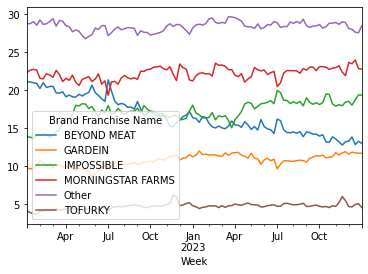

In [20]:
weekly_market_share.reset_index(inplace=True)
weekly_market_share.plot(x='Week',)

<AxesSubplot:xlabel='Week'>

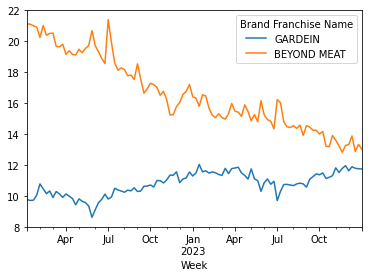

In [21]:
weekly_market_share.reset_index(inplace=True)
weekly_market_share.plot(x='Week', y=['GARDEIN','BEYOND MEAT'])

<AxesSubplot:xlabel='Week'>

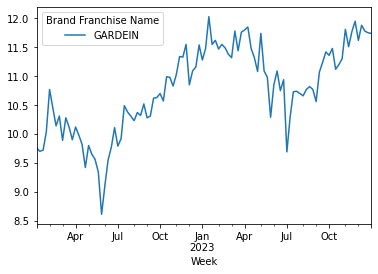

In [22]:
weekly_market_share.plot(x='Week', y=['GARDEIN'])

## 4.	Compute average price (in $) per ounce for each of the 6 brands in each week. Plot the trend in prices and shares by week for Gardein brand only (I need one graph which shows shares and prices). 

In [23]:
# Price per Volume averaged over all UPCs by Brand
weekly_price_per_volume = meat_subs_modified.groupby(['Week', 'Brand Franchise Name'])['Price per Volume'].mean().unstack(fill_value=0)
print('Table: Avg Price per Volume Weekly')
weekly_price_per_volume.reset_index(inplace=True)
weekly_price_per_volume

Table: Avg Price per Volume Weekly


Brand Franchise Name,Week,BEYOND MEAT,GARDEIN,IMPOSSIBLE,MORNINGSTAR FARMS,Other,TOFURKY
0,2022-01-09,8.94,7.71,7.96,7.89,8.74,9.11
1,2022-01-16,8.97,7.71,7.94,7.45,8.71,9.52
2,2022-01-23,9.03,7.63,8.19,7.44,8.94,9.29
3,2022-01-30,8.98,7.82,8.10,7.08,8.94,9.24
4,2022-02-06,9.44,7.74,8.37,7.95,8.89,9.34
...,...,...,...,...,...,...,...
99,2023-12-03,9.67,9.47,10.22,8.61,10.54,11.22
100,2023-12-10,9.67,9.80,10.27,8.57,10.57,11.23
101,2023-12-17,9.72,9.85,9.84,8.51,10.61,11.07
102,2023-12-24,9.94,9.95,9.97,8.33,10.60,11.16


In [24]:
# Price Per Ounce is not used anywhere for analysis, therefore commented out the calculations of Price per ounce

In [25]:
#temp = meat_subs_modified.copy(deep=True)
#temp['Price per Ounce'] = temp['Price per Volume'] / 16

In [26]:
#weekly_price_per_ounce = temp.groupby(['Week', 'Brand Franchise Name'])['Price per Ounce'].mean().unstack(fill_value=0)
#print('Table: Avg Price per Ounce Weekly')
#weekly_price_per_ounce

In [27]:
#weekly_price_per_ounce.reset_index(inplace=True)
#weekly_price_per_ounce.plot(x='Week', y = ['GARDEIN', 'BEYOND MEAT'])

In [28]:
# Average Price per Ounce plot is removed since its not used in subsequent analysis

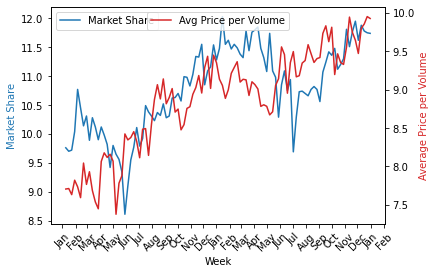

In [29]:
# Create figure and axes objects
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(weekly_market_share['Week'], weekly_market_share['GARDEIN'], color='tab:blue', label='Market Share')
ax1.set_xlabel('Week')
ax1.set_ylabel('Market Share', color='tab:blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second line plot on the secondary y-axis
ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['GARDEIN'], color='tab:red', label='Avg Price per Volume')
ax2.set_ylabel('Average Price per Volume', color='tab:red')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Set the locator and formatter for the x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)

# Show plot
plt.show()

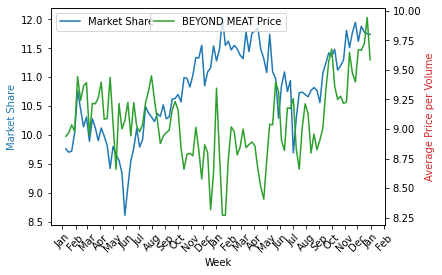

In [30]:
# Market share with average price of other brands

# Create figure and axes objects
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(weekly_market_share['Week'], weekly_market_share['GARDEIN'], color='tab:blue', label='Market Share')
ax1.set_xlabel('Week')
ax1.set_ylabel('Market Share', color='tab:blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second line plot on the secondary y-axis
#ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['GARDEIN'], color='tab:red', label='Avg Price per Volume')
ax2.set_ylabel('Average Price per Volume', color='tab:red')

# Plot the additional brands 'B', 'C', and 'D' on the secondary y-axis
ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['BEYOND MEAT'], color='tab:green', label='BEYOND MEAT Price')
#ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['MORNINGSTAR FARMS'], color='tab:orange', label='MORNINGSTAR FARMS Price')
#ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['IMPOSSIBLE'], color='tab:purple', label='IMPOSSIBLE Price')
#ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['PRIVATE LABEL'], color='tab:purple', label='PRIVATE LABEL Price')
#ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['Other'], color='tab:purple', label='Other Brands Price')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Set the locator and formatter for the x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)

# Show plot
plt.show()

## 5.	Compute the average price decrease when a brand is on Merchandising (e.g., 5% or 8%).

In [31]:
temp = meat_subs_modified.copy(deep=True)
temp['Merchandising'] = (temp['Price per Volume No Merch'] - temp['Price per Volume Any Merch']) / temp['Price per Volume No Merch']
temp['Merchandising']

44597     0.04
44598      NaN
44599      NaN
44600      NaN
44601     0.11
          ... 
332715   -0.04
332716    0.09
332717    0.07
332718    0.08
332719    0.02
Name: Merchandising, Length: 51030, dtype: float64

In [32]:
print('Average Price Decrease per Volume when a brand is on Merchandising (%):')
average_price_decrease = temp.groupby(['Brand Franchise Name'])['Merchandising'].mean()*100
average_price_decrease

Average Price Decrease per Volume when a brand is on Merchandising (%):


Brand Franchise Name
BEYOND MEAT         17.76
GARDEIN             14.70
IMPOSSIBLE          15.06
MORNINGSTAR FARMS   12.41
Other               14.74
TOFURKY              8.12
Name: Merchandising, dtype: float64

In [33]:
print('Overall Mean Price Decrease per Volume on Merchandising')
temp['Merchandising'].mean()*100

Overall Mean Price Decrease per Volume on Merchandising


14.38899298550541

## 6.	Create a dummy variable to indicate a week when there is a merchandising for a brand (here if any UPC of a brand is on promotion (that is it has a significant price reduction), the whole brand is considered to be on promotion and takes the value =1, else it is 0). This will be useful to compare the frequency of merchandising across brands. Create a table that looks like the following table.

# Trying to find the ideal variables for regression:

In [34]:
# Creating a dummy for Feature (a brand is on Feature)

# weekly_promo = temp.groupby(['Brand Franchise Name', 'Week'])['Merchandising'].transform(lambda x: int((x > 0.2).any())).rename('Whether on Promo')
# weekly_promo = weekly_promo.groupby([temp['Brand Franchise Name'], temp['Week']]).mean().reset_index()
# weekly_promo

In [35]:
# weekly_promo['Whether on Promo'].sum()

In [36]:
# Group by week and brand, and calculate total sales (dollars) for each brand for each week
weekly_brand_sales = meat_subs_modified.groupby(['Brand Franchise Name', 'Week'])['Dollar Sales'].sum()

# Calculate the total category sales (dollars) for each week
weekly_category_sales = weekly_brand_sales.groupby('Week').sum()

# Calculate the market share for each brand for each week
weekly_market_share = (weekly_brand_sales.div(weekly_category_sales, level='Week') * 100).round(2)

# Convert to DataFrame
weekly_market_share = weekly_market_share.reset_index()

# Appropriate Naming
weekly_market_share.rename(columns={'Dollar Sales': 'Market Share'}, inplace=True)

# Display the table of weekly market share for each brand
print("Table of Weekly Market Share:")
weekly_market_share

Table of Weekly Market Share:


,Brand Franchise Name,Week,Market Share
0,BEYOND MEAT,2022-01-09,21.11
1,BEYOND MEAT,2022-01-16,21.10
2,BEYOND MEAT,2022-01-23,20.99
3,BEYOND MEAT,2022-01-30,20.91
4,BEYOND MEAT,2022-02-06,20.24
...,...,...,...
619,TOFURKY,2023-12-03,4.73
620,TOFURKY,2023-12-10,4.69
621,TOFURKY,2023-12-17,5.00
622,TOFURKY,2023-12-24,5.10


In [37]:
weekly_price_per_volume = meat_subs_modified.groupby(['Brand Franchise Name', 'Week'])['Price per Volume'].agg(Average_Price='mean').reset_index()

# Appropriate Naming
weekly_price_per_volume.rename(columns={'Average_Price': 'Average Price'}, inplace=True)

weekly_price_per_volume

,Brand Franchise Name,Week,Average Price
0,BEYOND MEAT,2022-01-09,8.94
1,BEYOND MEAT,2022-01-16,8.97
2,BEYOND MEAT,2022-01-23,9.03
3,BEYOND MEAT,2022-01-30,8.98
4,BEYOND MEAT,2022-02-06,9.44
...,...,...,...
619,TOFURKY,2023-12-03,11.22
620,TOFURKY,2023-12-10,11.23
621,TOFURKY,2023-12-17,11.07
622,TOFURKY,2023-12-24,11.16


In [38]:
# Merchandising - Price Reduction, Feature, Display
temp['Price_Reduction'] = (temp['Price per Volume No Merch'] - temp['Price per Volume Price Reductions Only']) / temp['Price per Volume No Merch']
temp['Feature'] = (temp['Price per Volume No Merch'] - temp['Price per Volume Feature Only']) / temp['Price per Volume No Merch']
temp['Display'] = (temp['Price per Volume No Merch'] - temp['Price per Volume Display Only']) / temp['Price per Volume No Merch']
temp['Feature_and_Display'] = (temp['Price per Volume No Merch'] - temp['Price per Volume Feature and Display']) / temp['Price per Volume No Merch']

temp[['Price_Reduction','Feature','Display','Feature_and_Display']].mean()


Price_Reduction       0.17
Feature               0.13
Display               0.03
Feature_and_Display   0.15
dtype: float64

In [39]:
temp.groupby(['Brand Franchise Name'])[['Price_Reduction','Feature','Display','Feature_and_Display','Merchandising']].mean()*100

,Price_Reduction,Feature,Display,Feature_and_Display,Merchandising
Brand Franchise Name,,,,,
BEYOND MEAT,20.22,15.39,3.23,16.77,17.76
GARDEIN,14.97,15.39,1.69,15.34,14.70
IMPOSSIBLE,16.92,14.17,2.29,14.57,15.06
MORNINGSTAR FARMS,13.60,9.40,2.47,12.27,12.41
Other,17.41,17.52,3.79,26.60,14.74
TOFURKY,14.93,18.81,0.83,12.71,8.12


In [40]:
weekly_merch = temp.groupby(['Brand Franchise Name', 'Week'])[['Price_Reduction','Feature','Display','Feature_and_Display']].mean()*100
weekly_merch = weekly_merch.reset_index()

weekly_merch

,Brand Franchise Name,Week,Price_Reduction,Feature,Display,Feature_and_Display
0,BEYOND MEAT,2022-01-09,10.76,4.11,3.75,7.58
1,BEYOND MEAT,2022-01-16,9.73,3.95,2.90,-0.82
2,BEYOND MEAT,2022-01-23,8.71,19.76,-1.91,12.59
3,BEYOND MEAT,2022-01-30,9.65,4.75,-1.52,2.80
4,BEYOND MEAT,2022-02-06,16.19,-12.12,-2.68,NaN
...,...,...,...,...,...,...
619,TOFURKY,2023-12-03,15.46,NaN,-0.49,NaN
620,TOFURKY,2023-12-10,10.08,NaN,0.12,NaN
621,TOFURKY,2023-12-17,18.14,NaN,1.23,NaN
622,TOFURKY,2023-12-24,16.44,NaN,0.08,NaN


In [41]:
weekly_merch.isnull().sum()

Brand Franchise Name      0
Week                      0
Price_Reduction           0
Feature                 223
Display                   0
Feature_and_Display     336
dtype: int64

In [42]:
weekly_merch = weekly_merch.fillna(0)
weekly_merch.isnull().sum()

Brand Franchise Name    0
Week                    0
Price_Reduction         0
Feature                 0
Display                 0
Feature_and_Display     0
dtype: int64

In [43]:
# Merge the DataFrames
df = pd.merge(weekly_market_share, weekly_price_per_volume, on=['Brand Franchise Name', 'Week'], how='left')
df = pd.merge(df, weekly_merch, on=['Brand Franchise Name', 'Week'], how='left')
df

,Brand Franchise Name,Week,Market Share,Average Price,Price_Reduction,Feature,Display,Feature_and_Display
0,BEYOND MEAT,2022-01-09,21.11,8.94,10.76,4.11,3.75,7.58
1,BEYOND MEAT,2022-01-16,21.10,8.97,9.73,3.95,2.90,-0.82
2,BEYOND MEAT,2022-01-23,20.99,9.03,8.71,19.76,-1.91,12.59
3,BEYOND MEAT,2022-01-30,20.91,8.98,9.65,4.75,-1.52,2.80
4,BEYOND MEAT,2022-02-06,20.24,9.44,16.19,-12.12,-2.68,0.00
...,...,...,...,...,...,...,...,...
619,TOFURKY,2023-12-03,4.73,11.22,15.46,0.00,-0.49,0.00
620,TOFURKY,2023-12-10,4.69,11.23,10.08,0.00,0.12,0.00
621,TOFURKY,2023-12-17,5.00,11.07,18.14,0.00,1.23,0.00
622,TOFURKY,2023-12-24,5.10,11.16,16.44,0.00,0.08,0.00


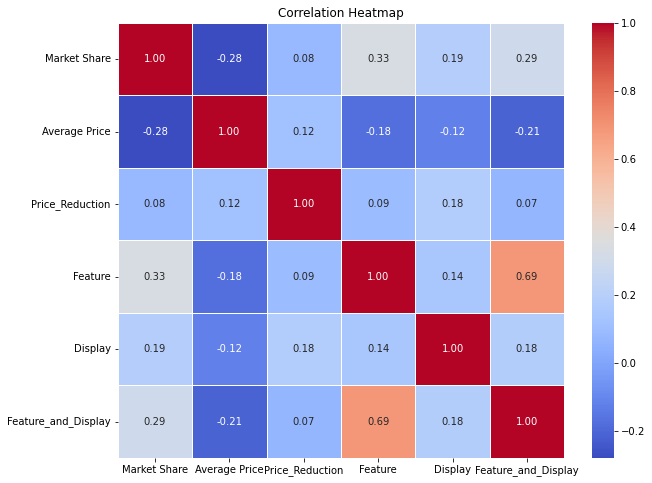

In [44]:
# Checking for correlations between varaibles:
correlation_matrix = df.corr()

# Plotting the heat-map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 7.	Run a OLS regression model (for each of 6 brands) to predict Market share using the above variables or any other variables that you think can be included in the model. Write a careful report on your findings. Calculate price elasticity for Gardein brand.

In [45]:
# Iterate over unique brands
for brand in df['Brand Franchise Name'].unique():
    print(f"Regression results for Brand {brand}:")
    
    # Filter data for the current brand
    brand_data = df[df['Brand Franchise Name'] == brand]
    
    # Fit regression model
    X = sm.add_constant(brand_data.drop(columns=['Week','Market Share', 'Brand Franchise Name','Feature_and_Display']))
    y = brand_data['Market Share']
    model = sm.OLS(y, X).fit()
    
    # Print regression results
    print(model.summary())
    print("\n")

Regression results for Brand BEYOND MEAT:
                            OLS Regression Results                            
Dep. Variable:           Market Share   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     14.35
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           2.83e-09
Time:                        12:46:00   Log-Likelihood:                -214.01
No. Observations:                 104   AIC:                             438.0
Df Residuals:                      99   BIC:                             451.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------


In [46]:
temp2 = df.copy(deep=True)
temp2.head()

,Brand Franchise Name,Week,Market Share,Average Price,Price_Reduction,Feature,Display,Feature_and_Display
0,BEYOND MEAT,2022-01-09,21.11,8.94,10.76,4.11,3.75,7.58
1,BEYOND MEAT,2022-01-16,21.10,8.97,9.73,3.95,2.90,-0.82
2,BEYOND MEAT,2022-01-23,20.99,9.03,8.71,19.76,-1.91,12.59
3,BEYOND MEAT,2022-01-30,20.91,8.98,9.65,4.75,-1.52,2.80
4,BEYOND MEAT,2022-02-06,20.24,9.44,16.19,-12.12,-2.68,0.00


In [47]:
temp2 = pd.get_dummies(temp2, columns=['Brand Franchise Name'],drop_first=True)
temp2.head()

,Week,Market Share,Average Price,Price_Reduction,Feature,Display,Feature_and_Display,Brand Franchise Name_GARDEIN,Brand Franchise Name_IMPOSSIBLE,Brand Franchise Name_MORNINGSTAR FARMS,Brand Franchise Name_Other,Brand Franchise Name_TOFURKY
0,2022-01-09,21.11,8.94,10.76,4.11,3.75,7.58,0,0,0,0,0
1,2022-01-16,21.10,8.97,9.73,3.95,2.90,-0.82,0,0,0,0,0
2,2022-01-23,20.99,9.03,8.71,19.76,-1.91,12.59,0,0,0,0,0
3,2022-01-30,20.91,8.98,9.65,4.75,-1.52,2.80,0,0,0,0,0
4,2022-02-06,20.24,9.44,16.19,-12.12,-2.68,0.00,0,0,0,0,0


In [48]:
# Regression on Dummies for Brand, along with other variables

# Fit regression model
X = sm.add_constant(temp2.drop(columns=['Week','Market Share']))
y = temp2['Market Share']
model = sm.OLS(y, X).fit()
    
# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Market Share   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     2528.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:46:00   Log-Likelihood:                -990.53
No. Observations:                 624   AIC:                             2003.
Df Residuals:                     613   BIC:                             2052.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [49]:
gardein = df[df['Brand Franchise Name'] == 'GARDEIN'].copy(deep=True).reset_index()
gardein = gardein.drop(columns='index')
gardein.head()

,Brand Franchise Name,Week,Market Share,Average Price,Price_Reduction,Feature,Display,Feature_and_Display
0,GARDEIN,2022-01-09,9.76,7.71,8.37,5.99,-12.07,3.52
1,GARDEIN,2022-01-16,9.70,7.71,10.17,13.90,-4.71,0.00
2,GARDEIN,2022-01-23,9.72,7.63,14.59,12.82,-4.80,23.54
3,GARDEIN,2022-01-30,10.04,7.82,15.41,18.96,-4.54,24.07
4,GARDEIN,2022-02-06,10.77,7.74,15.53,23.09,-0.79,0.00


In [50]:
# Iterate over unique brands
for brand in df['Brand Franchise Name'].unique():
    if brand != 'GARDEIN':
        
         # Filter data for the current brand
        brand_data = df[df['Brand Franchise Name'] == brand].copy(deep=True)

        # Reset index to ensure correct indexing
        brand_data.reset_index(drop=True, inplace=True)
        
        # Copy the 'Average Price' column for the current brand to the 'gardein' DataFrame
        gardein[f'{brand} Avg Price'] = brand_data['Average Price'].copy(deep=True)
        gardein[f'{brand} Price_Reduction'] = brand_data['Price_Reduction'].copy(deep=True)
        gardein[f'{brand} Feature'] = brand_data['Feature'].copy(deep=True)
        gardein[f'{brand} Display'] = brand_data['Display'].copy(deep=True)
        #gardein[f'{brand} Feature_and_Display'] = brand_data['Feature_and_Display'].copy(deep=True)

gardein.head()

,Brand Franchise Name,Week,Market Share,Average Price,Price_Reduction,Feature,Display,Feature_and_Display,BEYOND MEAT Avg Price,BEYOND MEAT Price_Reduction,...,MORNINGSTAR FARMS Feature,MORNINGSTAR FARMS Display,Other Avg Price,Other Price_Reduction,Other Feature,Other Display,TOFURKY Avg Price,TOFURKY Price_Reduction,TOFURKY Feature,TOFURKY Display
0,GARDEIN,2022-01-09,9.76,7.71,8.37,5.99,-12.07,3.52,8.94,10.76,...,5.44,-5.93,8.74,15.29,17.44,4.28,9.11,19.28,0.00,2.08
1,GARDEIN,2022-01-16,9.70,7.71,10.17,13.90,-4.71,0.00,8.97,9.73,...,0.90,4.57,8.71,14.43,29.91,6.78,9.52,16.49,0.00,0.42
2,GARDEIN,2022-01-23,9.72,7.63,14.59,12.82,-4.80,23.54,9.03,8.71,...,4.02,11.24,8.94,16.63,28.30,9.78,9.29,12.87,0.00,-0.03
3,GARDEIN,2022-01-30,10.04,7.82,15.41,18.96,-4.54,24.07,8.98,9.65,...,21.17,10.44,8.94,16.24,23.39,5.50,9.24,24.05,0.00,-1.88
4,GARDEIN,2022-02-06,10.77,7.74,15.53,23.09,-0.79,0.00,9.44,16.19,...,17.78,-9.68,8.89,18.30,16.26,7.49,9.34,21.84,0.00,2.93


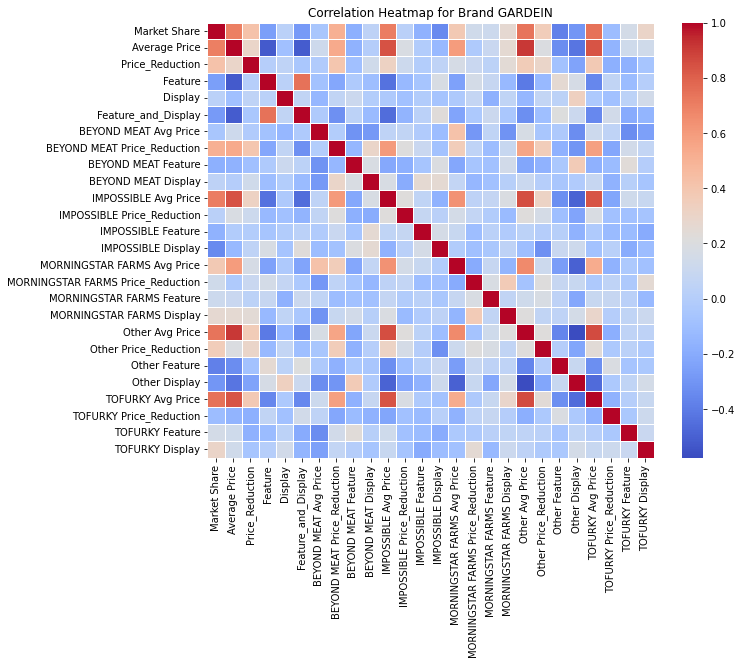

In [51]:
# Checking for correlations between varaibles:
correlation_matrix = gardein.corr()

# Plotting the heat-map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Brand GARDEIN')
plt.show()

In [52]:
## For Tomorrow:
# average prices of other brands in the model
# or avg price reductions?
# feature and display interaction (feature and price_reduction and display interaction?)

In [53]:
correlation_matrix

,Market Share,Average Price,Price_Reduction,Feature,Display,Feature_and_Display,BEYOND MEAT Avg Price,BEYOND MEAT Price_Reduction,BEYOND MEAT Feature,BEYOND MEAT Display,...,MORNINGSTAR FARMS Feature,MORNINGSTAR FARMS Display,Other Avg Price,Other Price_Reduction,Other Feature,Other Display,TOFURKY Avg Price,TOFURKY Price_Reduction,TOFURKY Feature,TOFURKY Display
Market Share,1.00,0.70,0.42,-0.26,0.03,-0.28,-0.06,0.51,-0.18,0.04,...,0.11,0.26,0.74,0.35,-0.38,-0.30,0.74,-0.11,0.15,0.30
Average Price,0.70,1.00,0.30,-0.52,-0.09,-0.52,0.13,0.54,-0.16,0.00,...,0.10,0.26,0.91,0.20,-0.34,-0.43,0.84,-0.16,0.13,0.13
Price_Reduction,0.42,0.30,1.00,0.01,0.05,-0.05,-0.02,0.40,-0.09,0.13,...,0.04,0.25,0.36,0.30,-0.08,-0.24,0.38,-0.18,-0.17,-0.06
Feature,-0.26,-0.52,0.01,1.00,0.03,0.75,-0.08,-0.22,-0.02,-0.11,...,0.09,-0.13,-0.41,-0.13,0.26,0.16,-0.36,0.06,-0.12,0.01
Display,0.03,-0.09,0.05,0.03,1.00,0.06,-0.14,0.06,0.11,-0.01,...,-0.17,0.06,-0.14,0.07,0.04,0.33,-0.04,-0.08,0.04,0.14
Feature_and_Display,-0.28,-0.52,-0.05,0.75,0.06,1.00,-0.03,-0.32,0.04,-0.12,...,0.11,-0.05,-0.33,-0.10,0.21,0.11,-0.35,0.14,-0.21,-0.15
BEYOND MEAT Avg Price,-0.06,0.13,-0.02,-0.08,-0.14,-0.03,1.00,-0.01,-0.31,-0.28,...,0.05,-0.31,0.17,-0.06,-0.03,-0.33,0.12,0.05,-0.33,-0.25
BEYOND MEAT Price_Reduction,0.51,0.54,0.40,-0.22,0.06,-0.32,-0.01,1.00,-0.14,0.30,...,-0.11,0.09,0.56,0.36,-0.17,-0.30,0.58,-0.22,0.14,0.07
BEYOND MEAT Feature,-0.18,-0.16,-0.09,-0.02,0.11,0.04,-0.31,-0.14,1.00,0.19,...,-0.09,0.14,-0.22,-0.17,-0.04,0.37,-0.17,-0.11,0.23,0.00
BEYOND MEAT Display,0.04,0.00,0.13,-0.11,-0.01,-0.12,-0.28,0.30,0.19,1.00,...,-0.08,0.01,0.10,0.01,-0.06,-0.02,0.08,-0.17,0.01,-0.06


In [54]:
# No of UPCs on Price_Reduction per week per brand
price_reduction_freq = temp.groupby(['Brand Franchise Name', 'Week'])['Price per Volume Price Reductions Only'].transform(lambda x: int((x > 0).sum())).rename('No of UPCs on Price_Reduction')
price_reduction_freq = price_reduction_freq.groupby([temp['Brand Franchise Name'], temp['Week']]).mean().reset_index()
price_reduction_freq

,Brand Franchise Name,Week,No of UPCs on Price_Reduction
0,BEYOND MEAT,2022-01-09,14.00
1,BEYOND MEAT,2022-01-16,14.00
2,BEYOND MEAT,2022-01-23,14.00
3,BEYOND MEAT,2022-01-30,14.00
4,BEYOND MEAT,2022-02-06,13.00
...,...,...,...
619,TOFURKY,2023-12-03,14.00
620,TOFURKY,2023-12-10,14.00
621,TOFURKY,2023-12-17,14.00
622,TOFURKY,2023-12-24,15.00


In [55]:
# No of UPCs on Feature per week per brand
feature_freq = temp.groupby(['Brand Franchise Name', 'Week'])['Price per Volume Feature Only'].transform(lambda x: int((x > 0).sum())).rename('No of UPCs on Feature')
feature_freq = feature_freq.groupby([temp['Brand Franchise Name'], temp['Week']]).mean().reset_index()
feature_freq

,Brand Franchise Name,Week,No of UPCs on Feature
0,BEYOND MEAT,2022-01-09,6.00
1,BEYOND MEAT,2022-01-16,2.00
2,BEYOND MEAT,2022-01-23,7.00
3,BEYOND MEAT,2022-01-30,3.00
4,BEYOND MEAT,2022-02-06,2.00
...,...,...,...
619,TOFURKY,2023-12-03,0.00
620,TOFURKY,2023-12-10,0.00
621,TOFURKY,2023-12-17,0.00
622,TOFURKY,2023-12-24,0.00


In [56]:
# No of UPCs on Display per week per brand
display_freq = temp.groupby(['Brand Franchise Name', 'Week'])['Price per Volume Display Only'].transform(lambda x: int((x > 0).sum())).rename('No of UPCs on Display')
display_freq = display_freq.groupby([temp['Brand Franchise Name'], temp['Week']]).mean().reset_index()
display_freq

,Brand Franchise Name,Week,No of UPCs on Display
0,BEYOND MEAT,2022-01-09,13.00
1,BEYOND MEAT,2022-01-16,13.00
2,BEYOND MEAT,2022-01-23,13.00
3,BEYOND MEAT,2022-01-30,13.00
4,BEYOND MEAT,2022-02-06,13.00
...,...,...,...
619,TOFURKY,2023-12-03,12.00
620,TOFURKY,2023-12-10,13.00
621,TOFURKY,2023-12-17,10.00
622,TOFURKY,2023-12-24,12.00


In [57]:
# No of UPCs on both Display as well as Feature per week per brand
display_feature_freq = temp.groupby(['Brand Franchise Name', 'Week'])['Price per Volume Feature and Display'].transform(lambda x: int((x > 0).sum())).rename('No of UPCs on both Feature and Display')
display_feature_freq = display_feature_freq.groupby([temp['Brand Franchise Name'], temp['Week']]).mean().reset_index()
display_feature_freq

,Brand Franchise Name,Week,No of UPCs on both Feature and Display
0,BEYOND MEAT,2022-01-09,4.00
1,BEYOND MEAT,2022-01-16,1.00
2,BEYOND MEAT,2022-01-23,4.00
3,BEYOND MEAT,2022-01-30,2.00
4,BEYOND MEAT,2022-02-06,0.00
...,...,...,...
619,TOFURKY,2023-12-03,0.00
620,TOFURKY,2023-12-10,0.00
621,TOFURKY,2023-12-17,0.00
622,TOFURKY,2023-12-24,0.00


In [58]:
# Merge the DataFrames
df2 = pd.merge(df, price_reduction_freq, on=['Brand Franchise Name', 'Week'], how='left')
df2 = pd.merge(df2, feature_freq, on=['Brand Franchise Name', 'Week'], how='left')
df2 = pd.merge(df2, display_freq, on=['Brand Franchise Name', 'Week'], how='left')
df2 = pd.merge(df2, display_feature_freq, on=['Brand Franchise Name', 'Week'], how='left')
df2


,Brand Franchise Name,Week,Market Share,Average Price,Price_Reduction,Feature,Display,Feature_and_Display,No of UPCs on Price_Reduction,No of UPCs on Feature,No of UPCs on Display,No of UPCs on both Feature and Display
0,BEYOND MEAT,2022-01-09,21.11,8.94,10.76,4.11,3.75,7.58,14.00,6.00,13.00,4.00
1,BEYOND MEAT,2022-01-16,21.10,8.97,9.73,3.95,2.90,-0.82,14.00,2.00,13.00,1.00
2,BEYOND MEAT,2022-01-23,20.99,9.03,8.71,19.76,-1.91,12.59,14.00,7.00,13.00,4.00
3,BEYOND MEAT,2022-01-30,20.91,8.98,9.65,4.75,-1.52,2.80,14.00,3.00,13.00,2.00
4,BEYOND MEAT,2022-02-06,20.24,9.44,16.19,-12.12,-2.68,0.00,13.00,2.00,13.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
619,TOFURKY,2023-12-03,4.73,11.22,15.46,0.00,-0.49,0.00,14.00,0.00,12.00,0.00
620,TOFURKY,2023-12-10,4.69,11.23,10.08,0.00,0.12,0.00,14.00,0.00,13.00,0.00
621,TOFURKY,2023-12-17,5.00,11.07,18.14,0.00,1.23,0.00,14.00,0.00,10.00,0.00
622,TOFURKY,2023-12-24,5.10,11.16,16.44,0.00,0.08,0.00,15.00,0.00,12.00,0.00


In [59]:
df2.groupby(['Brand Franchise Name'])\
    [['No of UPCs on Price_Reduction','No of UPCs on Feature','No of UPCs on Display',\
      'No of UPCs on both Feature and Display']].mean()

,No of UPCs on Price_Reduction,No of UPCs on Feature,No of UPCs on Display,No of UPCs on both Feature and Display
Brand Franchise Name,,,,
BEYOND MEAT,15.78,2.62,12.47,1.09
GARDEIN,30.82,5.41,11.29,1.73
IMPOSSIBLE,17.12,2.87,11.45,1.61
MORNINGSTAR FARMS,31.49,11.94,19.17,5.86
Other,197.92,7.61,82.72,1.81
TOFURKY,11.13,0.11,11.05,0.04


In [60]:
# Iterate over unique brands
for brand in df2['Brand Franchise Name'].unique():
    print(f"Regression results for Brand {brand}:")
    
    # Filter data for the current brand
    brand_data = df2[df2['Brand Franchise Name'] == brand]
    
    # Fit regression model
    X = sm.add_constant(brand_data.drop(columns=['Week','Market Share', 'Brand Franchise Name']))
    y = brand_data['Market Share']
    model = sm.OLS(y, X).fit()
    
    # Print regression results
    print(model.summary())
    print("\n")

Regression results for Brand BEYOND MEAT:
                            OLS Regression Results                            
Dep. Variable:           Market Share   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     14.27
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           2.92e-14
Time:                        12:46:01   Log-Likelihood:                -193.00
No. Observations:                 104   AIC:                             406.0
Df Residuals:                      94   BIC:                             432.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [61]:
# Running a Regression without the no of UPCs on promotion (using only dummies)
brand_data = df2[df2['Brand Franchise Name'] == 'GARDEIN']

# Fit regression model
X = sm.add_constant(brand_data.drop(columns=['Week','Market Share', 'Brand Franchise Name',\
    'No of UPCs on Price_Reduction','No of UPCs on Feature', 'No of UPCs on Display','No of UPCs on both Feature and Display']))
y = brand_data['Market Share']
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())
print("\n")

                            OLS Regression Results                            
Dep. Variable:           Market Share   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     24.00
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.09e-15
Time:                        12:46:02   Log-Likelihood:                -75.396
No. Observations:                 104   AIC:                             162.8
Df Residuals:                      98   BIC:                             178.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.1017    

In [62]:
# Running a Regression without the no of UPCs on promotion (using only dummies)
brand_data = df2[df2['Brand Franchise Name'] == 'GARDEIN']

# Fit regression model
X = sm.add_constant(brand_data.drop(columns=['Week','Market Share', 'Brand Franchise Name',\
    'No of UPCs on Price_Reduction','No of UPCs on Feature', 'No of UPCs on Display','No of UPCs on both Feature and Display']))
y = brand_data['Market Share']
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())
print("\n")

                            OLS Regression Results                            
Dep. Variable:           Market Share   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     24.00
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.09e-15
Time:                        12:46:02   Log-Likelihood:                -75.396
No. Observations:                 104   AIC:                             162.8
Df Residuals:                      98   BIC:                             178.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.1017    

Considering Only Gardein, Price_Reductions, Feature and Display are all 1 for every week
Only both 'Feature and Display' has few 0 values and can be used for regression

In [63]:
# Running a Regression without the no of UPCs on promotion (using only dummies)
brand_data = df2[df2['Brand Franchise Name'] == 'GARDEIN']

# Fit regression model
X = sm.add_constant(brand_data.drop(columns=['Week','Market Share', 'Brand Franchise Name',\
    'Price_Reduction','Feature','Display']))
y = brand_data['Market Share']
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())
print("\n")

                            OLS Regression Results                            
Dep. Variable:           Market Share   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     22.17
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           2.79e-16
Time:                        12:46:02   Log-Likelihood:                -72.064
No. Observations:                 104   AIC:                             158.1
Df Residuals:                      97   BIC:                             176.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [64]:
# Looking at other important columns:

In [65]:
temp['Sub-Category Name'].unique()

array(['FZ MEAT SUBSTITUTES', 'FZ POULTRY SUBSTITUTE',
       'PROCESSED FZ POULTRY SUBSTITUTE',
       'PROCESSED RFG POULTRY SUBSTITUTE', 'RFG MEAT SUBSTITUTES',
       'RFG POULTRY SUBSTITUTE'], dtype=object)

In [66]:
temp['Form'].unique()

array(['CRUMBLE', 'PATTY', 'BURGER', 'PIECE', 'LINK', 'SLICED', 'SHREDS',
       'BURGER PATTY', 'BREAKFAST PATTY', 'TIP', 'FILET', 'GROUND',
       'MEATBALL', 'SLIDER', 'CAKE', 'STRIP', 'BITE', 'BALL',
       'BREAKFAST LINK', 'ROLL', 'BREAKFAST SAUSAGE PATTY', 'HOT DOG',
       'ROAST', 'WHOLE', 'BLOCK', 'STEAK', 'NUGGET', 'SLICE', 'PULLED',
       'FINGER', 'BREAST', 'TENDER', 'WING', 'CUTLET',
       'NOT STATED ON PACKAGE', 'DICED', 'POPCORN', 'DIPPER',
       'BREAKFAST BITES', 'DINNER SAUSAGE LINK', 'BRATWURST', 'FRANK',
       'CHUNK', 'BREAKFAST SAUSAGE LINK', 'BREAKFAST SAUSAGE ROLL',
       'CUBE', 'POPPER', 'SPLIT ROPE', 'ROPE', 'ULTRA THIN SLICE',
       'DELI SLICED', 'DRUMSTICK', 'SAUSAGE', 'FRIES', 'SHREDDED',
       'FUN NUGGETS', 'TENDERS', 'CHUB'], dtype=object)

In [67]:
temp['Flavor / Scent'].nunique()

242

In [68]:
temp['Product Type'].unique()

array(['MEAT SUBSTITUTE', 'FISH SUBSTITUTE', 'SEAFOOD SUBSTITUTE',
       'FALAFEL', 'BURGER', 'SOY SUBSTITUTE', 'TEMPEH',
       'POULTRY SUBSTITUTE', 'CHICKEN SUBSTITUTE',
       'PLANT BASED SUBSTITUTE', 'PLANT BASED CHICKEN SUBSTITUTE', 'TOFU',
       'TOFU SUBSTITUTE', 'SEITAN', 'PLANT BASED TURKEY SUBSTITUTE',
       'SOY'], dtype=object)

In [69]:
temp['Type Of Meat Substituted'].unique()

array(['BEEF', 'SAUSAGE', 'VALUE NOT AVAILABLE', 'STEAK', 'HOT DOG',
       'SALAMI', 'PORK SAUSAGE', 'FISH', 'ITALIAN SAUSAGE', 'CRAB',
       'PORK', 'BURGER', 'CHORIZO', 'MEATBALL', 'CHICKEN AND PORK',
       'SHRIMP', 'BELT FISH', 'HAM', nan, 'ITALIAN MEATBALL', 'LONGANIZA',
       'TOFU', 'BACON', 'PEPPERONI', 'FRANKFURTER', 'BOLOGNA',
       'PORK BACON', 'TEMPEH', 'BRAT', 'PASTRAMI', 'ROAST BEEF',
       'ITALIAN DELI MEAT', 'CORNED BEEF', 'SALMON', 'BRATWURST',
       'CHICKEN', 'CARNE ASADA STEAK'], dtype=object)

In [70]:
temp['Type Of Substitute'].nunique()

69

In [71]:
temp['Cooked Info'].unique()

array(['COOK THOROUGHLY', 'VALUE NOT AVAILABLE', 'UNCOOKED',
       'FULLY COOKED', 'COOK FROZEN', 'HEAT THOROUGHLY',
       'NEEDS TO BE FULLY COOKED', 'HEAT AND SERVE', 'PREBAKED',
       'READY IN 10 MINUTES', 'READY TO COOK', 'COOKED', 'READY TO EAT',
       'BRAISED', 'SERVED HOT AND COLD', 'GRILLED', 'FLAME BROILED',
       'COOK BEFORE EATING', 'BAKED', 'OVEN ROASTED', 'READY TO HEAT',
       'HEAT AND EAT', 'COOK BEFORE SERVING', 'COOK & SERVE', 'PRECOOKED'],
      dtype=object)

In [72]:
temp['ACV Weighted Distribution'].describe()

count   51030.00
mean        8.95
std        14.12
min         0.00
25%         0.48
50%         2.73
75%         9.68
max        74.27
Name: ACV Weighted Distribution, dtype: float64

In [73]:
## TO DO:

# 2: Since we have seen Beyond Meat as a strong competition, 
# only its price and 'No of upcs on promo' of that brand can used for regression 
# multi-collinearity problems -- NEED RESOLUTION

# 3: include the previous years data to get the initial graphs

# 4: use geography variable

# 5: How to use other attributes: 
# packaging, ACV weighted distribution, 

# 6: important products (UPCs) for the brand: reviews

# can display have lagged effects? 
# we check by taking only 1 or 2 popular products to see the effect



In [74]:
# Descriptive anallytics:
# 1. how many UPCS per brand?
# 2. how much $sales is notionally lost (can be gained) by gardein for the lack of products which other brands have
# Can having fewer no of UPCs on merchandising have an impact on Market Share? bcoz Beyond Meat has fewer nos

# 3. beyond meat more discounts but fewer products on discount

### FORM

In [75]:
form_analysis = temp.copy()

In [76]:
# Create combined categories for 'Form'
form_analysis['Form_Combined'] = form_analysis['Form'].replace({
    'BURGER PATTY': 'BURGER/PATTY',
    '.*PATTY.* ': 'BURGER/PATTY',
    '.*BURGER.*': 'BURGER/PATTY',
    'GROUND': 'GROUND/CRUMBLES',
    'CRUMBLE': 'GROUND/CRUMBLES',
    'CRUMBLED': 'GROUND/CRUMBLES',
    '.*NUGGET.*' : 'NUGGET',
    'BREAKFAST PATTY' : 'BREAKFAST SAUSAGE PATTIES',
    '.*SAUSAGE LINK.*' : 'SAUSAGE LINK'

}, regex=True)

# Define a list of allowed form values
allowed_forms = ['BURGER/PATTY', 'GROUND/CRUMBLES', 'NUGGET', 'BREAKFAST SAUSAGE PATTIES']

# Replace any values not in the allowed list with 'Other'
form_analysis['Form_Combined'] = form_analysis['Form_Combined'].apply(lambda x: x if x in allowed_forms else 'Other')


# Group by brand and form, then calculate sum of dollar sales
g1 = form_analysis.groupby(['Brand Franchise Name', 'Form_Combined'])['Dollar Sales'].sum().reset_index()

# Calculate dollar share for each form within each brand
g1['Dollar Share'] = g1.groupby('Brand Franchise Name')['Dollar Sales'].apply(lambda x: x / x.sum())

# Optionally, format the dollar share for better readability
g1['Dollar Share'] = g1['Dollar Share'].map(lambda x: '{:.2%}'.format(x))

# Print the result
g1


,Brand Franchise Name,Form_Combined,Dollar Sales,Dollar Share
0,BEYOND MEAT,BREAKFAST SAUSAGE PATTIES,5138534.11,10.28%
1,BEYOND MEAT,BURGER/PATTY,15209040.25,30.42%
2,BEYOND MEAT,GROUND/CRUMBLES,10168863.67,20.34%
3,BEYOND MEAT,NUGGET,253309.90,0.51%
4,BEYOND MEAT,Other,19231714.45,38.46%
5,GARDEIN,BREAKFAST SAUSAGE PATTIES,160841.80,0.51%
6,GARDEIN,BURGER/PATTY,1478776.49,4.64%
7,GARDEIN,GROUND/CRUMBLES,3435939.02,10.79%
8,GARDEIN,NUGGET,1738465.33,5.46%
9,GARDEIN,Other,25029631.62,78.60%


In [77]:
# Pivot the DataFrame
pivot_df = g1.pivot_table(index='Form_Combined', columns='Brand Franchise Name', values='Dollar Share', aggfunc='first', fill_value=0)
# Print the result
pivot_df

Brand Franchise Name,BEYOND MEAT,GARDEIN,IMPOSSIBLE,MORNINGSTAR FARMS,Other,TOFURKY
Form_Combined,,,,,,
BREAKFAST SAUSAGE PATTIES,10.28%,0.51%,0,5.21%,0.78%,0
BURGER/PATTY,30.42%,4.64%,11.39%,19.24%,14.17%,0.01%
GROUND/CRUMBLES,20.34%,10.79%,30.49%,6.50%,5.19%,0.00%
NUGGET,0.51%,5.46%,15.34%,11.28%,10.21%,0
Other,38.46%,78.60%,42.78%,57.77%,69.66%,99.99%


## Gardein's dollar shares are good for Tender, Filet, Meatball, breast, strip and wing (70%)

In [78]:
# Filter the DataFrame for rows where 'Brand Franchise Name' is 'GARDEIN'
gardein_data = form_analysis[form_analysis['Brand Franchise Name'] == 'GARDEIN']

# Group by brand and form, then calculate sum of dollar sales
g2 = gardein_data.groupby(['Brand Franchise Name', 'Form'])['Dollar Sales'].sum().reset_index()

# Calculate dollar share for each form within each brand
g2['Dollar Share'] = g2.groupby('Brand Franchise Name')['Dollar Sales'].apply(lambda x: x / x.sum())

# Optionally, format the dollar share for better readability
g2['Dollar Share'] = g2['Dollar Share'].map(lambda x: '{:.2%}'.format(x))

# Print the result
g2.sort_values(by='Dollar Sales', ascending=False)

,Brand Franchise Name,Form,Dollar Sales,Dollar Share
8,GARDEIN,FILET,6042978.72,18.98%
19,GARDEIN,TENDER,6016682.41,18.89%
10,GARDEIN,GROUND,3262555.53,10.25%
2,GARDEIN,BREAST,3171578.68,9.96%
12,GARDEIN,MEATBALL,2710748.60,8.51%
18,GARDEIN,STRIP,2466916.63,7.75%
21,GARDEIN,WING,1879876.04,5.90%
13,GARDEIN,NUGGET,1738465.33,5.46%
3,GARDEIN,BURGER,951807.26,2.99%
7,GARDEIN,CUTLET,586561.72,1.84%


In [79]:
# Filter the DataFrame for rows where 'Brand Franchise Name' is 'GARDEIN'
gardein_data = form_analysis[form_analysis['Brand Franchise Name'] == 'BEYOND MEAT']

# Group by brand and form, then calculate sum of dollar sales
g2 = gardein_data.groupby(['Brand Franchise Name', 'Form'])['Dollar Sales'].sum().reset_index()

# Calculate dollar share for each form within each brand
g2['Dollar Share'] = g2.groupby('Brand Franchise Name')['Dollar Sales'].apply(lambda x: x / x.sum())

# Optionally, format the dollar share for better readability
g2['Dollar Share'] = g2['Dollar Share'].map(lambda x: '{:.2%}'.format(x))

# Print the result
g2.sort_values(by='Dollar Sales', ascending=False)

,Brand Franchise Name,Form,Dollar Sales,Dollar Share
1,BEYOND MEAT,BURGER PATTY,15209040.25,30.42%
4,BEYOND MEAT,LINK,13397300.88,26.79%
3,BEYOND MEAT,GROUND,9402461.75,18.80%
0,BEYOND MEAT,BREAKFAST PATTY,5138534.11,10.28%
5,BEYOND MEAT,MEATBALL,2643112.75,5.29%
7,BEYOND MEAT,PATTY,1557658.11,3.12%
9,BEYOND MEAT,TENDER,1268393.42,2.54%
2,BEYOND MEAT,CRUMBLE,766401.92,1.53%
8,BEYOND MEAT,POPCORN,365249.29,0.73%
6,BEYOND MEAT,NUGGET,253309.90,0.51%


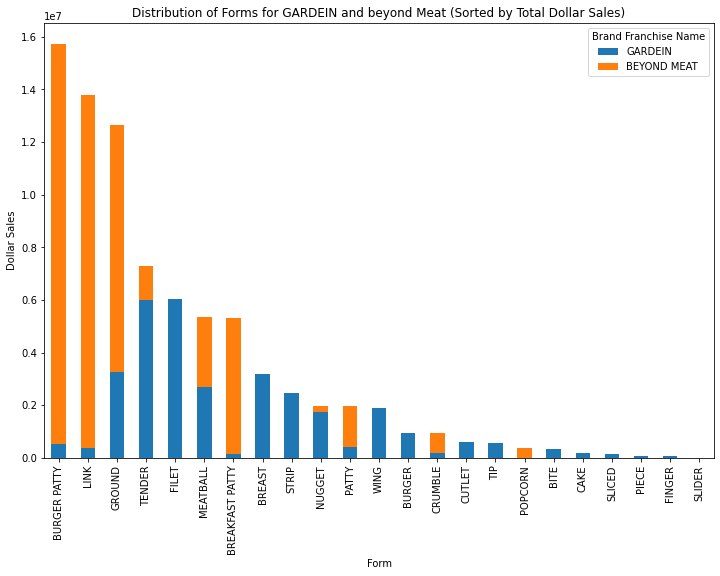

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'form_analysis' is your original DataFrame

# Filter the DataFrame for rows where 'Brand Franchise Name' is 'GARDEIN' and 'beyond Meat'
gardein_data = form_analysis[form_analysis['Brand Franchise Name'] == 'GARDEIN']
beyond_meat_data = form_analysis[form_analysis['Brand Franchise Name'] == 'BEYOND MEAT']

# Group by 'Form' and calculate sum of dollar sales for GARDEIN
gardein_grouped = gardein_data.groupby('Form')['Dollar Sales'].sum()

# Group by 'Form' and calculate sum of dollar sales for beyond Meat
beyond_meat_grouped = beyond_meat_data.groupby('Form')['Dollar Sales'].sum()

# Combine the groups from both DataFrames
combined = pd.concat([gardein_grouped, beyond_meat_grouped], axis=1, keys=['GARDEIN', 'BEYOND MEAT'])

# Sum the dollar sales across both brands for each form and sort by the total
combined['Total'] = combined.sum(axis=1)
combined_sorted = combined.sort_values(by='Total', ascending=False)

# Plot stacked bar chart
combined_sorted.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Forms for GARDEIN and beyond Meat (Sorted by Total Dollar Sales)')
plt.xlabel('Form')
plt.ylabel('Dollar Sales')
plt.legend(title='Brand Franchise Name')
plt.show()


## GROUND/CRUMBLES

### Package

In [81]:
# Assuming 'form_analysis' is your original DataFrame

# Filter the DataFrame to exclude rows where 'Brand Franchise Name' is 'Other'
filtered_data = form_analysis[form_analysis['Form_Combined'] == 'GROUND/CRUMBLES']

# Group by 'Brand Franchise Name' and 'Package', then calculate sum of 'Dollar Sales'
grouped_data = filtered_data.groupby(['Brand Franchise Name', 'Package'])['Dollar Sales'].sum().reset_index()

# Calculate dollar share for each 'Package' within each brand franchise name
grouped_data['Dollar Share'] = grouped_data.groupby('Brand Franchise Name')['Dollar Sales'].apply(lambda x: x / x.sum())

# Print the result
#grouped_data


In [82]:
# Pivot the DataFrame
pivot_df1 = grouped_data.pivot_table(index='Package', columns='Brand Franchise Name', values='Dollar Share', aggfunc='first', fill_value=0)
# Print the result
#pivot_df1

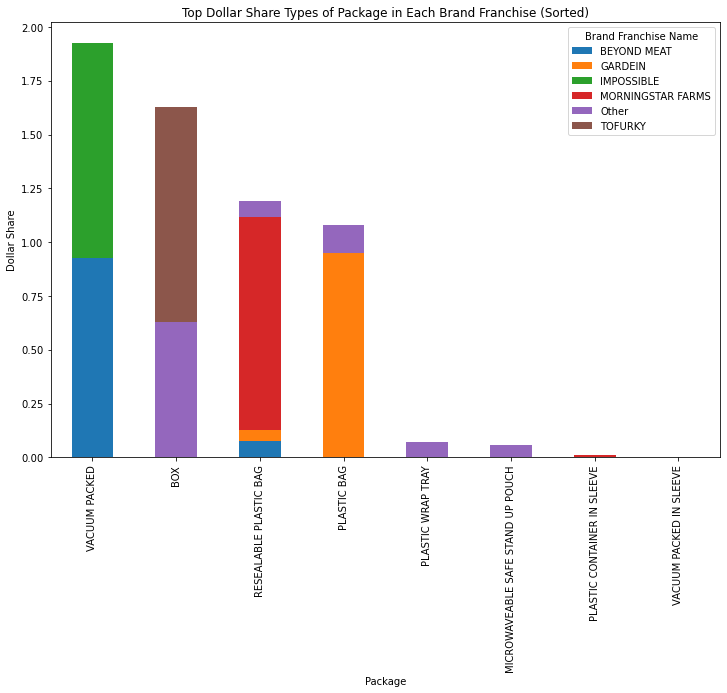

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'form_analysis' is your original DataFrame

# Filter the DataFrame to include only rows where 'Form_Combined' is 'GROUND/CRUMBLES'
filtered_data = form_analysis[form_analysis['Form_Combined'] == 'GROUND/CRUMBLES']

# Group by 'Brand Franchise Name' and 'Package', then calculate sum of 'Dollar Sales'
grouped_data = filtered_data.groupby(['Brand Franchise Name', 'Package'])['Dollar Sales'].sum().reset_index()

# Calculate dollar share for each 'Package' within each brand franchise name
grouped_data['Dollar Share'] = grouped_data.groupby('Brand Franchise Name')['Dollar Sales'].apply(lambda x: x / x.sum())

# Find the top dollar share types of package for each brand franchise
top_packages = grouped_data.groupby('Brand Franchise Name').apply(lambda x: x.nlargest(5, 'Dollar Share')).reset_index(drop=True)

# Pivot the DataFrame to prepare for plotting
pivot_df = top_packages.pivot(index='Package', columns='Brand Franchise Name', values='Dollar Share')

# Calculate total dollar share across all brand franchises for each package type
pivot_df['Total'] = pivot_df.sum(axis=1)

# Sort the DataFrame by total dollar share in descending order
pivot_df_sorted = pivot_df.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot stacked bar chart
pivot_df_sorted.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top Dollar Share Types of Package in Each Brand Franchise (Sorted)')
plt.xlabel('Package')
plt.ylabel('Dollar Share')
plt.legend(title='Brand Franchise Name')
plt.show()


Competitor brands are using Vaccum Packed type of Packaging.

Checked Difference in brands for Total Ounce, Total Count, Flavor/Scent, Type of Meat Substitute of Ground/Crumbles. Not much difference across Gardein and other brands.

## Nugget

### Checked Package, Total Count, Flavor/Scent, Type of meat Substitute not much difference between competitor brands and Gardein.

In [84]:
# Assuming 'form_analysis' is your original DataFrame

# Filter the DataFrame to exclude rows where 'Brand Franchise Name' is 'Other'
filtered_data = form_analysis[form_analysis['Form_Combined'] == 'NUGGET']

# Group by 'Brand Franchise Name' and 'Package', then calculate sum of 'Dollar Sales'
grouped_data = filtered_data.groupby(['Brand Franchise Name', 'Total Ounces'])['Dollar Sales'].sum().reset_index()

# Calculate dollar share for each 'Package' within each brand franchise name
grouped_data['Dollar Share'] = grouped_data.groupby('Brand Franchise Name')['Dollar Sales'].apply(lambda x: x / x.sum())

# Print the result
#grouped_data


In [85]:
# Pivot the DataFrame
pivot_df1 = grouped_data.pivot_table(index='Total Ounces', columns='Brand Franchise Name', values='Dollar Share', aggfunc='first', fill_value=0)
# Print the result
#pivot_df1

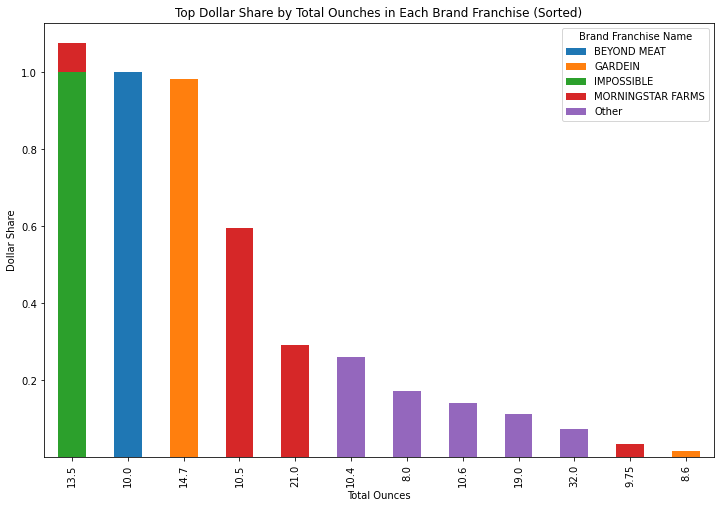

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'form_analysis' is your original DataFrame

# Filter the DataFrame to include only rows where 'Form_Combined' is 'GROUND/CRUMBLES'
filtered_data = form_analysis[form_analysis['Form_Combined'] == 'NUGGET']

# Group by 'Brand Franchise Name' and 'Package', then calculate sum of 'Dollar Sales'
grouped_data = filtered_data.groupby(['Brand Franchise Name', 'Total Ounces'])['Dollar Sales'].sum().reset_index()

# Calculate dollar share for each 'Package' within each brand franchise name
grouped_data['Dollar Share'] = grouped_data.groupby('Brand Franchise Name')['Dollar Sales'].apply(lambda x: x / x.sum())

# Find the top dollar share types of package for each brand franchise
top_packages = grouped_data.groupby('Brand Franchise Name').apply(lambda x: x.nlargest(5, 'Dollar Share')).reset_index(drop=True)

# Pivot the DataFrame to prepare for plotting
pivot_df = top_packages.pivot(index='Total Ounces', columns='Brand Franchise Name', values='Dollar Share')

# Calculate total dollar share across all brand franchises for each package type
pivot_df['Total'] = pivot_df.sum(axis=1)

# Sort the DataFrame by total dollar share in descending order
pivot_df_sorted = pivot_df.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot stacked bar chart
pivot_df_sorted.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top Dollar Share by Total Ounches in Each Brand Franchise (Sorted)')
plt.xlabel('Total Ounces')
plt.ylabel('Dollar Share')
plt.legend(title='Brand Franchise Name')
plt.show()


Check for statistical significance between the difference in Total Dollar Shares wrt Total Ounces between Impossible and Gardein

## Burger/Patty

### Package

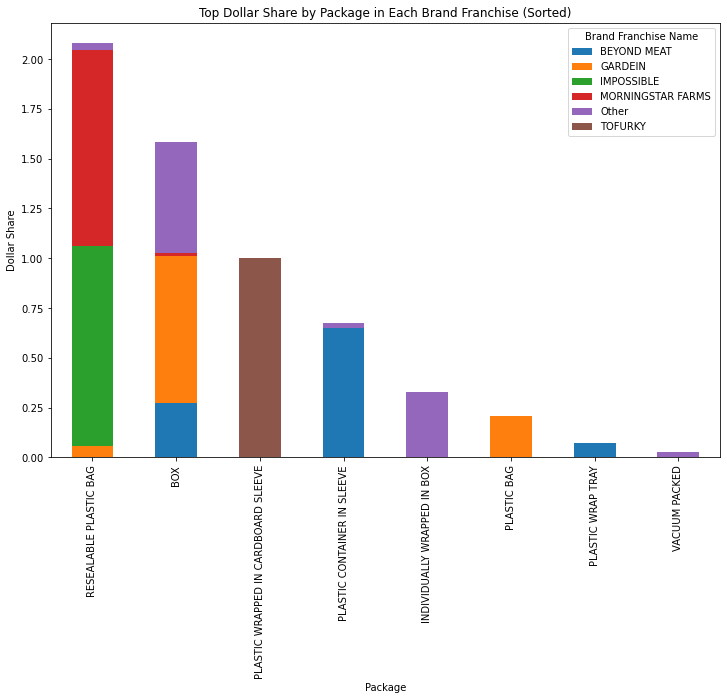

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'form_analysis' is your original DataFrame

# Filter the DataFrame to include only rows where 'Form_Combined' is 'GROUND/CRUMBLES'
filtered_data = form_analysis[form_analysis['Form_Combined'] == 'BURGER/PATTY']

# Group by 'Brand Franchise Name' and 'Package', then calculate sum of 'Dollar Sales'
grouped_data = filtered_data.groupby(['Brand Franchise Name', 'Package'])['Dollar Sales'].sum().reset_index()

# Calculate dollar share for each 'Package' within each brand franchise name
grouped_data['Dollar Share'] = grouped_data.groupby('Brand Franchise Name')['Dollar Sales'].apply(lambda x: x / x.sum())

# Find the top dollar share types of package for each brand franchise
top_packages = grouped_data.groupby('Brand Franchise Name').apply(lambda x: x.nlargest(5, 'Dollar Share')).reset_index(drop=True)

# Pivot the DataFrame to prepare for plotting
pivot_df = top_packages.pivot(index='Package', columns='Brand Franchise Name', values='Dollar Share')

# Calculate total dollar share across all brand franchises for each package type
pivot_df['Total'] = pivot_df.sum(axis=1)

# Sort the DataFrame by total dollar share in descending order
pivot_df_sorted = pivot_df.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot stacked bar chart
pivot_df_sorted.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top Dollar Share by Package in Each Brand Franchise (Sorted)')
plt.xlabel('Package')
plt.ylabel('Dollar Share')
plt.legend(title='Brand Franchise Name')
plt.show()


Competitors are using resealable plastic bag. Checked Tot count, ounces, flavor, etc but not much difference.

In [88]:
# Assuming 'form_analysis' is your original DataFrame

# Filter the DataFrame for rows where 'Form_Combined' is 'BURGER/PATTY' and 'Brand Franchise Name' is 'GARDEIN'
filtered_data = form_analysis[(form_analysis['Form_Combined'] == 'BURGER/PATTY') & (form_analysis['Brand Franchise Name'] == 'GARDEIN')]

# Group by 'Package' and count the number of unique products
package_counts = filtered_data.groupby('Package')['UPC 13 digit'].nunique()

# Print the result
package_counts


Package
BOX                       4
PLASTIC BAG               2
RESEALABLE PLASTIC BAG    1
Name: UPC 13 digit, dtype: int64

### BURGER/PATTY - Package: Competitors are using resealable plastic bag.
### GROUND/CRUMBLES - Package: Competitor brands are using Vaccum Packed type of Packaging.
### NUGGET - Total Ounces in Impossible is 13.5 and in Gardein is 14.7
### BREAKFAST SAUSAGE PATTIES - No difference

In [89]:
# import scipy.stats as stats

# # Assuming 'form_analysis' is your original DataFrame

# # Calculate 'Dollar Share' for 'Impossible' and 'Gardein' brand franchise names
# impossible_data = form_analysis[form_analysis['Brand Franchise Name'] == 'IMPOSSIBLE']['Dollar Sales'] / form_analysis[form_analysis['Brand Franchise Name'] == 'IMPOSSIBLE']['Total Ounces']
# gardein_data = form_analysis[form_analysis['Brand Franchise Name'] == 'GARDEIN']['Dollar Sales'] / form_analysis[form_analysis['Brand Franchise Name'] == 'GARDEIN']['Total Ounces']

# # Perform independent samples t-test
# t_statistic, p_value = stats.ttest_ind(impossible_data, gardein_data, equal_var=True)  # Assuming equal variances

# # Check the results
# if p_value < 0.05:
#     print("There is a statistically significant difference between the average total dollar shares of 'Impossible' and 'Gardein'.")
# else:
#     print("There is no statistically significant difference between the average total dollar shares of 'Impossible' and 'Gardein'.")

# print("p-value:", p_value)


## Best selling packaging

### Burger/Patty

In [90]:
# Assuming 'form_analysis' is your original DataFrame

# Assuming 'form_analysis' is your original DataFrame

# Filter the DataFrame for rows where 'Form_Combined' is 'BURGER/PATTY'
filtered_data = form_analysis[form_analysis['Form_Combined'] == 'BURGER/PATTY']

# Group by 'Package' and calculate sum of 'Dollar Sales'
package_sales = filtered_data.groupby('Package')['Dollar Sales'].sum()

# Calculate the total dollar sales for BURGER/PATTY across all brands
total_dollar_sales = package_sales.sum()

# Calculate the proportion of dollar sales for each package type
proportion_of_sales = package_sales / total_dollar_sales# Print the result


package_sales_sorted = proportion_of_sales.sort_values(ascending=False)
package_sales_sorted


Package
RESEALABLE PLASTIC BAG                0.40
BOX                                   0.26
PLASTIC CONTAINER IN SLEEVE           0.22
INDIVIDUALLY WRAPPED IN BOX           0.08
PLASTIC WRAP TRAY                     0.02
PLASTIC BAG                           0.01
VACUUM PACKED                         0.01
PLASTIC WRAPPED                       0.00
CARDBOARD BOX & WINDOW                0.00
PLASTIC TRAY IN CARDBOARD SLEEVE      0.00
PLASTIC WRAP IN BOX                   0.00
PLASTIC WRAPPED IN CARDBOARD SLEEVE   0.00
Name: Dollar Sales, dtype: float64

In [91]:
# Group by both 'Brand Franchise Name' and 'Package', and calculate sum of 'Dollar Sales'
grouped_data = form_analysis[form_analysis['Form_Combined'] == 'BURGER/PATTY'].groupby(['Brand Franchise Name', 'Package'])['Dollar Sales'].sum()

# Calculate the total dollar sales for BURGER/PATTY across all brands
total_dollar_sales = grouped_data.groupby('Brand Franchise Name').sum()

# Calculate the proportion of dollar sales for each package type within each brand franchise
proportion_of_sales = grouped_data / total_dollar_sales

# Get the packaging with the highest proportion of dollar sales for each brand franchise
best_selling_packaging = proportion_of_sales.groupby('Brand Franchise Name').idxmax()

# Create a DataFrame to display the result
result_df = pd.DataFrame({
    'Best Selling Packaging': best_selling_packaging.apply(lambda x: x[1]),
    'Proportion of Dollar Sales': proportion_of_sales.groupby('Brand Franchise Name').max()
})

# Print the result
result_df


,Best Selling Packaging,Proportion of Dollar Sales
Brand Franchise Name,,
BEYOND MEAT,PLASTIC CONTAINER IN SLEEVE,0.65
GARDEIN,BOX,0.73
IMPOSSIBLE,RESEALABLE PLASTIC BAG,1.00
MORNINGSTAR FARMS,RESEALABLE PLASTIC BAG,0.98
Other,BOX,0.56
TOFURKY,PLASTIC WRAPPED IN CARDBOARD SLEEVE,1.00


### Ground/Crumbles

In [92]:
# Assuming 'form_analysis' is your original DataFrame

# Assuming 'form_analysis' is your original DataFrame

# Filter the DataFrame for rows where 'Form_Combined' is 'BURGER/PATTY'
filtered_data = form_analysis[form_analysis['Form_Combined'] == 'GROUND/CRUMBLES']

# Group by 'Package' and calculate sum of 'Dollar Sales'
package_sales = filtered_data.groupby('Package')['Dollar Sales'].sum()

# Calculate the total dollar sales for BURGER/PATTY across all brands
total_dollar_sales = package_sales.sum()

# Calculate the proportion of dollar sales for each package type
proportion_of_sales = package_sales / total_dollar_sales# Print the result


package_sales_sorted = proportion_of_sales.sort_values(ascending=False)
package_sales_sorted


Package
VACUUM PACKED                       0.66
RESEALABLE PLASTIC BAG              0.15
PLASTIC BAG                         0.10
BOX                                 0.07
PLASTIC WRAP TRAY                   0.01
MICROWAVEABLE SAFE STAND UP POUCH   0.01
PLASTIC CONTAINER IN SLEEVE         0.00
CARDBOARD BOX & WINDOW              0.00
BAG IN BOX                          0.00
VACUUM PACKED IN SLEEVE             0.00
PLASTIC TRAY IN CARDBOARD SLEEVE    0.00
Name: Dollar Sales, dtype: float64

In [93]:
# Group by both 'Brand Franchise Name' and 'Package', and calculate sum of 'Dollar Sales'
grouped_data = form_analysis[form_analysis['Form_Combined'] == 'GROUND/CRUMBLES'].groupby(['Brand Franchise Name', 'Package'])['Dollar Sales'].sum()

# Calculate the total dollar sales for BURGER/PATTY across all brands
total_dollar_sales = grouped_data.groupby('Brand Franchise Name').sum()

# Calculate the proportion of dollar sales for each package type within each brand franchise
proportion_of_sales = grouped_data / total_dollar_sales

# Get the packaging with the highest proportion of dollar sales for each brand franchise
best_selling_packaging = proportion_of_sales.groupby('Brand Franchise Name').idxmax()

# Create a DataFrame to display the result
result_df = pd.DataFrame({
    'Best Selling Packaging': best_selling_packaging.apply(lambda x: x[1]),
    'Proportion of Dollar Sales': proportion_of_sales.groupby('Brand Franchise Name').max()
})

# Print the result
result_df


,Best Selling Packaging,Proportion of Dollar Sales
Brand Franchise Name,,
BEYOND MEAT,VACUUM PACKED,0.92
GARDEIN,PLASTIC BAG,0.95
IMPOSSIBLE,VACUUM PACKED,1.00
MORNINGSTAR FARMS,RESEALABLE PLASTIC BAG,0.99
Other,BOX,0.63
TOFURKY,BOX,1.00


### Time Series Analysis

In [94]:
meat_subs.head()

,Geography,Time,Product_x,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Any Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,...,Brand Name,Package,Total Count,Total Ounces,Form,Flavor / Scent,Product Type,Type Of Meat Substituted,Type Of Substitute,Cooked Info
0,Total US - Multi Outlet + Conv,Week Ending 01-09-22,AKUA FROZEN REGULAR MEAT SUBSTITUTE BURGER 6.7...,855146008081,14.52,6.05,8.47,8.47,NaN,NaN,...,AKUA,BOX,2.00,6.70,BURGER,REGULAR,MEAT SUBSTITUTE,VALUE NOT AVAILABLE,PLANT BASED,VALUE NOT AVAILABLE
1,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE BU...,855099007621,38.20,NaN,38.20,NaN,38.20,NaN,...,ALPHA,BOX,2.00,8.00,BURGER PATTY,ORIGINAL BEEFY,MEAT SUBSTITUTE,BEEF,PLANT BASED,COOK THOROUGHLY
2,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE CR...,855099007601,1609.87,437.44,1172.43,1022.50,12.60,107.60,...,ALPHA,RESEALABLE PLASTIC BAG,1.00,8.00,CRUMBLE,ORIGINAL BEEFY,MEAT SUBSTITUTE,BEEF,PLANT BASED,COOK THOROUGHLY
3,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN REGULAR MEAT SUBSTITUTE PATTY 8 O...,855099007341,35.25,12.65,22.60,6.23,3.47,2.22,...,ALPHA,RESEALABLE PLASTIC BAG,4.00,8.00,PATTY,REGULAR,MEAT SUBSTITUTE,SAUSAGE,PLANT BASED,COOK THOROUGHLY
4,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN SAUSAGE MEAT SUBSTITUTE CRUMBLE 8...,855099007611,165.36,114.10,51.25,51.25,NaN,NaN,...,ALPHA,RESEALABLE PLASTIC BAG,1.00,8.00,CRUMBLE,SAUSAGE,MEAT SUBSTITUTE,SAUSAGE,PLANT BASED,COOK THOROUGHLY


In [95]:
import pandas as pd

# Assuming 'df2' is your DataFrame
ts_analysis = meat_subs.copy()
# Creating a Week column in dataTime dataype for Time variable
ts_analysis['Week'] = pd.to_datetime(ts_analysis['Time'], format='Week Ending %m-%d-%y')

# Convert 'Week' variable to datetime format
ts_analysis['Week'] = pd.to_datetime(ts_analysis['Week'])

# Extract month, year, and day of the month
ts_analysis['Month'] = ts_analysis['Week'].dt.month
df2['Year'] = ts_analysis['Week'].dt.year
ts_analysis['Day'] = ts_analysis['Week'].dt.day

# Print the DataFrame with new columns
ts_analysis.head()

,Geography,Time,Product_x,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Any Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,...,Total Ounces,Form,Flavor / Scent,Product Type,Type Of Meat Substituted,Type Of Substitute,Cooked Info,Week,Month,Day
0,Total US - Multi Outlet + Conv,Week Ending 01-09-22,AKUA FROZEN REGULAR MEAT SUBSTITUTE BURGER 6.7...,855146008081,14.52,6.05,8.47,8.47,NaN,NaN,...,6.70,BURGER,REGULAR,MEAT SUBSTITUTE,VALUE NOT AVAILABLE,PLANT BASED,VALUE NOT AVAILABLE,2022-01-09,1,9
1,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE BU...,855099007621,38.20,NaN,38.20,NaN,38.20,NaN,...,8.00,BURGER PATTY,ORIGINAL BEEFY,MEAT SUBSTITUTE,BEEF,PLANT BASED,COOK THOROUGHLY,2022-01-09,1,9
2,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE CR...,855099007601,1609.87,437.44,1172.43,1022.50,12.60,107.60,...,8.00,CRUMBLE,ORIGINAL BEEFY,MEAT SUBSTITUTE,BEEF,PLANT BASED,COOK THOROUGHLY,2022-01-09,1,9
3,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN REGULAR MEAT SUBSTITUTE PATTY 8 O...,855099007341,35.25,12.65,22.60,6.23,3.47,2.22,...,8.00,PATTY,REGULAR,MEAT SUBSTITUTE,SAUSAGE,PLANT BASED,COOK THOROUGHLY,2022-01-09,1,9
4,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN SAUSAGE MEAT SUBSTITUTE CRUMBLE 8...,855099007611,165.36,114.10,51.25,51.25,NaN,NaN,...,8.00,CRUMBLE,SAUSAGE,MEAT SUBSTITUTE,SAUSAGE,PLANT BASED,COOK THOROUGHLY,2022-01-09,1,9


In [96]:
# Create combined categories for 'Form'
ts_analysis['Form_Combined'] = ts_analysis['Form'].replace({
    'BURGER PATTY': 'BURGER/PATTY',
    '.*PATTY.* ': 'BURGER/PATTY',
    '.*BURGER.*': 'BURGER/PATTY',
    'GROUND': 'GROUND/CRUMBLES',
    'CRUMBLE': 'GROUND/CRUMBLES',
    'CRUMBLED': 'GROUND/CRUMBLES',
    '.*NUGGET.*' : 'NUGGET',
    'BREAKFAST PATTY' : 'BREAKFAST SAUSAGE PATTIES',
    '.*SAUSAGE LINK.*' : 'SAUSAGE LINK'

}, regex=True)

# Define a list of allowed form values
allowed_forms = ['BURGER/PATTY', 'GROUND/CRUMBLES', 'NUGGET', 'BREAKFAST SAUSAGE PATTIES']

# Replace any values not in the allowed list with 'Other'
ts_analysis['Form_Combined'] = ts_analysis['Form_Combined'].apply(lambda x: x if x in allowed_forms else 'Other')

ts_analysis.head()

,Geography,Time,Product_x,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Any Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,...,Form,Flavor / Scent,Product Type,Type Of Meat Substituted,Type Of Substitute,Cooked Info,Week,Month,Day,Form_Combined
0,Total US - Multi Outlet + Conv,Week Ending 01-09-22,AKUA FROZEN REGULAR MEAT SUBSTITUTE BURGER 6.7...,855146008081,14.52,6.05,8.47,8.47,NaN,NaN,...,BURGER,REGULAR,MEAT SUBSTITUTE,VALUE NOT AVAILABLE,PLANT BASED,VALUE NOT AVAILABLE,2022-01-09,1,9,BURGER/PATTY
1,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE BU...,855099007621,38.20,NaN,38.20,NaN,38.20,NaN,...,BURGER PATTY,ORIGINAL BEEFY,MEAT SUBSTITUTE,BEEF,PLANT BASED,COOK THOROUGHLY,2022-01-09,1,9,BURGER/PATTY
2,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE CR...,855099007601,1609.87,437.44,1172.43,1022.50,12.60,107.60,...,CRUMBLE,ORIGINAL BEEFY,MEAT SUBSTITUTE,BEEF,PLANT BASED,COOK THOROUGHLY,2022-01-09,1,9,GROUND/CRUMBLES
3,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN REGULAR MEAT SUBSTITUTE PATTY 8 O...,855099007341,35.25,12.65,22.60,6.23,3.47,2.22,...,PATTY,REGULAR,MEAT SUBSTITUTE,SAUSAGE,PLANT BASED,COOK THOROUGHLY,2022-01-09,1,9,Other
4,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN SAUSAGE MEAT SUBSTITUTE CRUMBLE 8...,855099007611,165.36,114.10,51.25,51.25,NaN,NaN,...,CRUMBLE,SAUSAGE,MEAT SUBSTITUTE,SAUSAGE,PLANT BASED,COOK THOROUGHLY,2022-01-09,1,9,GROUND/CRUMBLES


In [97]:
# Calculate total dollar sales for each brand
brand_dollar_sales = ts_analysis.groupby('Brand Franchise Name')['Dollar Sales'].sum()

# Get the top 7 brands
top_5_brands = brand_dollar_sales.nlargest(5).index


# Rename brands that are not in the top 5 as "Other"
ts_analysis.loc[~ts_analysis['Brand Franchise Name']
                       .isin(top_5_brands), 'Brand Franchise Name'] = 'Other'


In [98]:
ts_analysis.columns

Index(['Geography', 'Time', 'Product_x', 'UPC 13 digit', 'Unit Sales',
       'Unit Sales No Merch', 'Unit Sales Any Merch',
       'Unit Sales Price Reductions Only', 'Unit Sales Feature Only',
       'Unit Sales Display Only', 'Unit Sales Feature and Display',
       'Volume Sales', 'Volume Sales No Merch', 'Volume Sales Any Merch',
       'Volume Sales Price Reductions Only', 'Volume Sales Feature Only',
       'Volume Sales Display Only', 'Volume Sales Feature and Display',
       'Dollar Sales', 'Dollar Sales No Merch', 'Dollar Sales Any Merch',
       'Dollar Sales Price Reductions Only', 'Dollar Sales Feature Only',
       'Dollar Sales Display Only', 'Dollar Sales Feature and Display',
       'Price per Unit', 'Price per Unit No Merch', 'Price per Unit Any Merch',
       'Price per Unit Price Reductions Only', 'Price per Unit Feature Only',
       'Price per Unit Display Only', 'Price per Unit Feature and Display',
       'Price per Volume', 'Price per Volume No Merch',
       

In [99]:
# Group by 'Brand Franchise Name' and count unique UPC13 values
unique_upc_counts = ts_analysis.groupby('Brand Franchise Name')['Total Ounces'].nunique()
unique_upc_counts

Brand Franchise Name
BEYOND MEAT           13
GARDEIN               33
IMPOSSIBLE             8
MORNINGSTAR FARMS     28
Other                105
PRIVATE LABEL         35
Name: Total Ounces, dtype: int64

In [100]:
# Group by 'Brand Franchise Name' and 'Form_Combined', and count unique UPC13 values
unique_upc_counts = ts_analysis.groupby(['Brand Franchise Name', 'Form_Combined'])['UPC 13 digit'].nunique().reset_index()

# Pivot the DataFrame
pivot_table = unique_upc_counts.pivot(index='Brand Franchise Name', columns='Form_Combined', values='UPC 13 digit')

# Print the result
pivot_table


Form_Combined,BREAKFAST SAUSAGE PATTIES,BURGER/PATTY,GROUND/CRUMBLES,NUGGET,Other
Brand Franchise Name,,,,,
BEYOND MEAT,2.00,8.00,3.00,1.00,14.00
GARDEIN,4.00,10.00,3.00,2.00,43.00
IMPOSSIBLE,NaN,3.00,4.00,4.00,15.00
MORNINGSTAR FARMS,2.00,26.00,15.00,12.00,35.00
Other,11.00,200.00,63.00,46.00,453.00
PRIVATE LABEL,4.00,73.00,20.00,9.00,92.00


In [101]:
# Define the regex pattern to handle decimal numbers
pattern = r'^(.*?)\s\d+\.*\d*\sOZ'

# Extract the name using regex and create a new column 'Name'
ts_analysis['Name1'] = ts_analysis['Product_x'].str.extract(pattern)
ts_analysis.head()

,Geography,Time,Product_x,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Any Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,...,Flavor / Scent,Product Type,Type Of Meat Substituted,Type Of Substitute,Cooked Info,Week,Month,Day,Form_Combined,Name1
0,Total US - Multi Outlet + Conv,Week Ending 01-09-22,AKUA FROZEN REGULAR MEAT SUBSTITUTE BURGER 6.7...,855146008081,14.52,6.05,8.47,8.47,NaN,NaN,...,REGULAR,MEAT SUBSTITUTE,VALUE NOT AVAILABLE,PLANT BASED,VALUE NOT AVAILABLE,2022-01-09,1,9,BURGER/PATTY,AKUA FROZEN REGULAR MEAT SUBSTITUTE BURGER
1,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE BU...,855099007621,38.20,NaN,38.20,NaN,38.20,NaN,...,ORIGINAL BEEFY,MEAT SUBSTITUTE,BEEF,PLANT BASED,COOK THOROUGHLY,2022-01-09,1,9,BURGER/PATTY,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE BU...
2,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE CR...,855099007601,1609.87,437.44,1172.43,1022.50,12.60,107.60,...,ORIGINAL BEEFY,MEAT SUBSTITUTE,BEEF,PLANT BASED,COOK THOROUGHLY,2022-01-09,1,9,GROUND/CRUMBLES,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE CR...
3,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN REGULAR MEAT SUBSTITUTE PATTY 8 O...,855099007341,35.25,12.65,22.60,6.23,3.47,2.22,...,REGULAR,MEAT SUBSTITUTE,SAUSAGE,PLANT BASED,COOK THOROUGHLY,2022-01-09,1,9,Other,ALPHA FROZEN REGULAR MEAT SUBSTITUTE PATTY
4,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN SAUSAGE MEAT SUBSTITUTE CRUMBLE 8...,855099007611,165.36,114.10,51.25,51.25,NaN,NaN,...,SAUSAGE,MEAT SUBSTITUTE,SAUSAGE,PLANT BASED,COOK THOROUGHLY,2022-01-09,1,9,GROUND/CRUMBLES,ALPHA FROZEN SAUSAGE MEAT SUBSTITUTE CRUMBLE


In [102]:
# Group by 'Brand Franchise Name' and 'Form_Combined', and count unique UPC13 values
unique_upc_counts = ts_analysis.groupby(['Brand Franchise Name', 'Form_Combined'])['Name1'].nunique().reset_index()

# Pivot the DataFrame
pivot_table = unique_upc_counts.pivot(index='Brand Franchise Name', columns='Form_Combined', values='Name1')

# Print the result
pivot_table


Form_Combined,BREAKFAST SAUSAGE PATTIES,BURGER/PATTY,GROUND/CRUMBLES,NUGGET,Other
Brand Franchise Name,,,,,
BEYOND MEAT,2.00,3.00,3.00,1.00,14.00
GARDEIN,4.00,7.00,2.00,2.00,38.00
IMPOSSIBLE,NaN,1.00,2.00,4.00,14.00
MORNINGSTAR FARMS,2.00,20.00,9.00,11.00,34.00
Other,11.00,174.00,57.00,43.00,420.00
PRIVATE LABEL,2.00,51.00,8.00,5.00,69.00


In [103]:
# Define a dictionary mapping month numbers to their names
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Map the month numbers to their names
ts_analysis['Month'] = ts_analysis['Month'].map(month_names)
ts_analysis['T'] = range(1, len(ts_analysis) + 1)
# Print the DataFrame with month names
ts_analysis.head()


,Geography,Time,Product_x,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Any Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,...,Product Type,Type Of Meat Substituted,Type Of Substitute,Cooked Info,Week,Month,Day,Form_Combined,Name1,T
0,Total US - Multi Outlet + Conv,Week Ending 01-09-22,AKUA FROZEN REGULAR MEAT SUBSTITUTE BURGER 6.7...,855146008081,14.52,6.05,8.47,8.47,NaN,NaN,...,MEAT SUBSTITUTE,VALUE NOT AVAILABLE,PLANT BASED,VALUE NOT AVAILABLE,2022-01-09,Jan,9,BURGER/PATTY,AKUA FROZEN REGULAR MEAT SUBSTITUTE BURGER,1
1,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE BU...,855099007621,38.20,NaN,38.20,NaN,38.20,NaN,...,MEAT SUBSTITUTE,BEEF,PLANT BASED,COOK THOROUGHLY,2022-01-09,Jan,9,BURGER/PATTY,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE BU...,2
2,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE CR...,855099007601,1609.87,437.44,1172.43,1022.50,12.60,107.60,...,MEAT SUBSTITUTE,BEEF,PLANT BASED,COOK THOROUGHLY,2022-01-09,Jan,9,GROUND/CRUMBLES,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE CR...,3
3,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN REGULAR MEAT SUBSTITUTE PATTY 8 O...,855099007341,35.25,12.65,22.60,6.23,3.47,2.22,...,MEAT SUBSTITUTE,SAUSAGE,PLANT BASED,COOK THOROUGHLY,2022-01-09,Jan,9,Other,ALPHA FROZEN REGULAR MEAT SUBSTITUTE PATTY,4
4,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN SAUSAGE MEAT SUBSTITUTE CRUMBLE 8...,855099007611,165.36,114.10,51.25,51.25,NaN,NaN,...,MEAT SUBSTITUTE,SAUSAGE,PLANT BASED,COOK THOROUGHLY,2022-01-09,Jan,9,GROUND/CRUMBLES,ALPHA FROZEN SAUSAGE MEAT SUBSTITUTE CRUMBLE,5


In [104]:
# Assuming your DataFrame is named 'ts_analysis'

# Filter the DataFrame based on specified conditions
filtered_data = ts_analysis[(ts_analysis['Geography'] == 'Total US - Multi Outlet + Conv') & 
                            (ts_analysis['Brand Franchise Name'] == 'GARDEIN') &
                            (ts_analysis['Form_Combined'] != 'Other')]

# Group by 'Total Ounces' and 'Form_Combined' and sum the 'Unit Sales'
sales_by_ounces_form = filtered_data.groupby(['Total Ounces', 'Form_Combined'])[['Unit Sales','Dollar Sales']].sum()

# Calculate the total dollar sales
total_dollar_sales = filtered_data['Dollar Sales'].sum()
# Calculate the percentage of dollar sales for each group
sales_by_ounces_form['% Dollar Sales'] = (sales_by_ounces_form['Dollar Sales'] / total_dollar_sales) * 100

# Print the result
# Sort the result in descending order
sales_by_ounces_form = sales_by_ounces_form.sort_values(by='Unit Sales', ascending=False)

# Print the result
sales_by_ounces_form


,,Unit Sales,Dollar Sales,% Dollar Sales
Total Ounces,Form_Combined,,,
13.70,GROUND/CRUMBLES,7495838.65,36913609.60,42.74
14.70,NUGGET,2379796.27,19289597.11,22.33
8.00,BURGER/PATTY,2301998.85,11017026.74,12.76
12.00,BURGER/PATTY,1043798.25,4901163.23,5.67
24.00,BURGER/PATTY,750419.74,8535822.36,9.88
8.00,BREAKFAST SAUSAGE PATTIES,519622.04,2301848.60,2.67
14.00,GROUND/CRUMBLES,239635.76,1975523.60,2.29
8.60,NUGGET,92029.59,402077.18,0.47
50.80,BURGER/PATTY,49387.73,827294.77,0.96


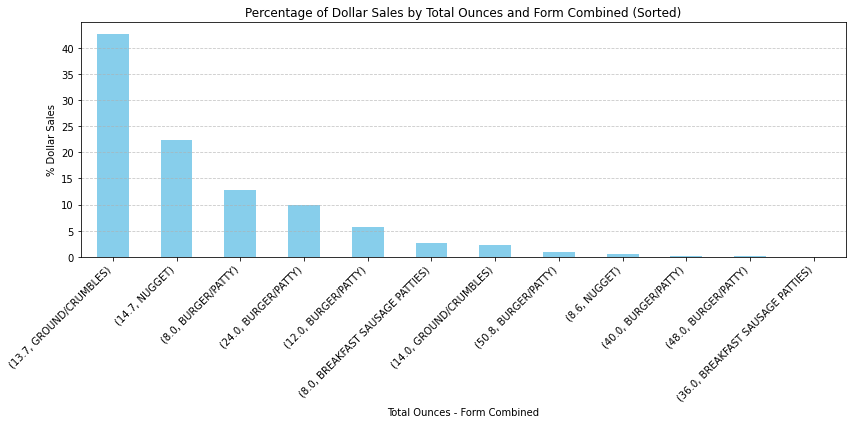

In [105]:
import matplotlib.pyplot as plt

# Sorting the DataFrame by '% Dollar Sales' in descending order
sales_by_ounces_form_sorted = sales_by_ounces_form.sort_values(by='% Dollar Sales', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sales_by_ounces_form_sorted['% Dollar Sales'].plot(kind='bar', color='skyblue')
plt.title('Percentage of Dollar Sales by Total Ounces and Form Combined (Sorted)')
plt.xlabel('Total Ounces - Form Combined')
plt.ylabel('% Dollar Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Gardein - BREAKFAST SAUSAGE PATTIES 36 OZ not selling so well.

In [106]:
# Assuming your DataFrame is named 'ts_analysis'

# Filter the DataFrame based on specified conditions
filtered_data = ts_analysis[(ts_analysis['Geography'] == 'Total US - Multi Outlet + Conv') & 
                            (ts_analysis['Brand Franchise Name'] == 'BEYOND MEAT') &
                            (ts_analysis['Form_Combined'] != 'Other')]

# Group by 'Total Ounces' and 'Form_Combined' and sum the 'Unit Sales'
sales_by_ounces_form = filtered_data.groupby(['Total Ounces', 'Form_Combined'])[['Unit Sales','Dollar Sales']].sum()
# Calculate the total dollar sales
total_dollar_sales = filtered_data['Dollar Sales'].sum()
# Calculate the percentage of dollar sales for each group
sales_by_ounces_form['% Dollar Sales'] = (sales_by_ounces_form['Dollar Sales'] / total_dollar_sales) * 100
# Print the result
# Sort the result in descending order
sales_by_ounces_form = sales_by_ounces_form.sort_values(by='Unit Sales', ascending=False)

# Print the result
sales_by_ounces_form


Unit Sales  Dollar Sales  \
Total Ounces Form_Combined                                         
8.00         BURGER/PATTY              13001060.26   63317116.07   
7.40         BREAKFAST SAUSAGE PATTIES  8546975.15   39398742.91   
16.00        GROUND/CRUMBLES            7130321.05   54405277.66   
32.00        BURGER/PATTY               2382695.15   35289239.83   
10.00        GROUND/CRUMBLES            1385176.99    6536365.08   
             NUGGET                      672738.98    3285485.01   
16.00        BURGER/PATTY                513591.24    4399716.50   
40.00        BURGER/PATTY                    86.13       1383.48   

                                        % Dollar Sales  
Total Ounces Form_Combined                              
8.00         BURGER/PATTY                        30.64  
7.40         BREAKFAST SAUSAGE PATTIES           19.07  
16.00        GROUND/CRUMBLES                     26.33  
32.00        BURGER/PATTY                        17.08  
10.00        GROUND/CRUMBLES                      3.16  
             NUGGET                               1.59  
16.00        BURGER/PATTY                         2.13  
40.00        BURGER/PATTY                         0.00

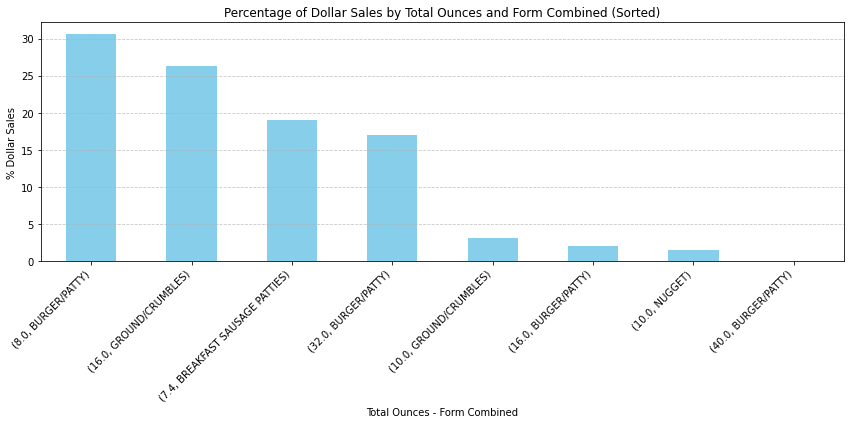

In [107]:
import matplotlib.pyplot as plt

# Sorting the DataFrame by '% Dollar Sales' in descending order
sales_by_ounces_form_sorted = sales_by_ounces_form.sort_values(by='% Dollar Sales', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sales_by_ounces_form_sorted['% Dollar Sales'].plot(kind='bar', color='skyblue')
plt.title('Percentage of Dollar Sales by Total Ounces and Form Combined (Sorted)')
plt.xlabel('Total Ounces - Form Combined')
plt.ylabel('% Dollar Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [108]:
# Assuming your DataFrame is named 'ts_analysis'

# Filter the DataFrame based on specified conditions
filtered_data = ts_analysis[(ts_analysis['Geography'] == 'Total US - Multi Outlet + Conv') & 
                            (ts_analysis['Brand Franchise Name'] == 'IMPOSSIBLE') &
                            (ts_analysis['Form_Combined'] != 'Other')]

# Group by 'Total Ounces' and 'Form_Combined' and sum the 'Unit Sales'
sales_by_ounces_form = filtered_data.groupby(['Total Ounces', 'Form_Combined'])[['Unit Sales','Dollar Sales']].sum()

# Calculate the total dollar sales
total_dollar_sales = filtered_data['Dollar Sales'].sum()
# Calculate the percentage of dollar sales for each group
sales_by_ounces_form['% Dollar Sales'] = (sales_by_ounces_form['Dollar Sales'] / total_dollar_sales) * 100
# Print the result
# Sort the result in descending order
sales_by_ounces_form = sales_by_ounces_form.sort_values(by='Unit Sales', ascending=False)

# Print the result
sales_by_ounces_form


Unit Sales  Dollar Sales  % Dollar Sales
Total Ounces Form_Combined                                            
12.00        GROUND/CRUMBLES 13868391.08   95925424.77           46.19
13.50        NUGGET           7111732.03   52773802.10           25.41
24.00        BURGER/PATTY     4145519.98   54907247.22           26.44
14.00        GROUND/CRUMBLES   796094.43    3967476.62            1.91
32.00        NUGGET              8560.08     119565.54            0.06
             BURGER/PATTY         144.01       2659.89            0.00

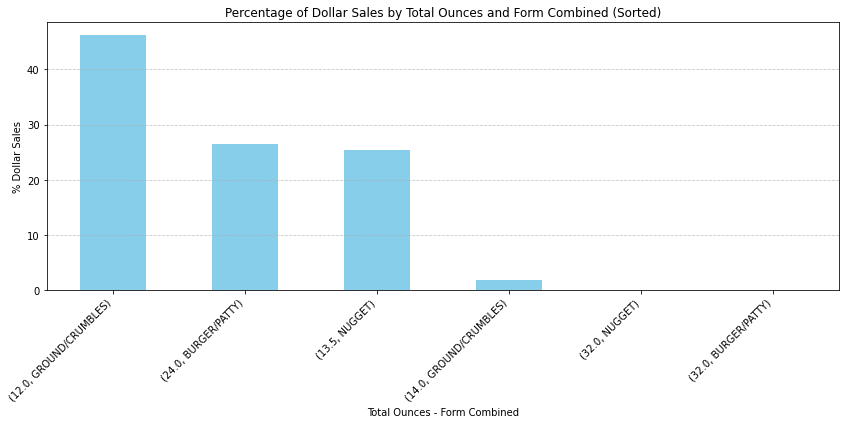

In [109]:
import matplotlib.pyplot as plt

# Sorting the DataFrame by '% Dollar Sales' in descending order
sales_by_ounces_form_sorted = sales_by_ounces_form.sort_values(by='% Dollar Sales', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sales_by_ounces_form_sorted['% Dollar Sales'].plot(kind='bar', color='skyblue')
plt.title('Percentage of Dollar Sales by Total Ounces and Form Combined (Sorted)')
plt.xlabel('Total Ounces - Form Combined')
plt.ylabel('% Dollar Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [110]:
# Group by 'Name1' and sum the 'Unit Sales' for each group
unit_sales_by_item = ts_analysis[(ts_analysis['Geography'] == 'Total US - Multi Outlet + Conv') & 
                            (ts_analysis['Brand Franchise Name'] == 'GARDEIN')].groupby(['Name1','Form_Combined'])['Unit Sales'].sum()

# Sort the result in descending order
unit_sales_by_item = unit_sales_by_item.sort_values(ascending=False)

# Print the result
unit_sales_by_item


Name1                                                                        Form_Combined            
GARDEIN FROZEN REGULAR MEAT SUBSTITUTE GROUND                                GROUND/CRUMBLES             7495838.65
GARDEIN FROZEN REGULAR MEAT SUBSTITUTE MEATBALL                              Other                       4934895.97
GARDEIN FROZEN SEVEN GRAIN PLANT BASED CHICKEN SUBSTITUTE TENDER             Other                       4289376.62
GARDEIN FROZEN MANDARIN ORANGE POULTRY SUBSTITUTE BREAST                     Other                       4029690.10
GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR PLANT BASED SUBSTITUTE FILET     Other                       3606392.09
GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN POULTRY SUBSTITUTE TENDER        Other                       3500397.31
GARDEIN FROZEN REGULAR FISH SUBSTITUTE FILET                                 Other                       3220042.51
GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PLANT BASED SUBSTITUTE NUGGET    NUGGET  

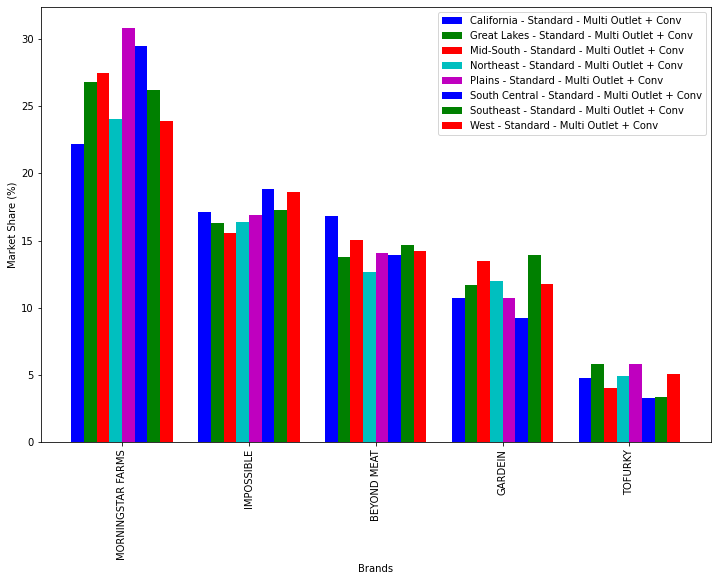

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Filter out the 'Total US - Multi Outlet + Conv' row
meat_subs_regions = meat_subs[meat_subs['Geography'] != 'Total US - Multi Outlet + Conv']
 
# Create a function to get the market share for each region (top 5 brands)
def get_region_market_share(data, region, top_count=5):
  region_data = data[data['Geography'] == region]
  total_sales = region_data['Dollar Sales'].sum()
  market_shares = []
  brands = set(data['Brand Franchise Name'].unique())
 
  # Sort brands by sales in descending order (top sellers first)
  brands = sorted(brands, key=lambda brand: region_data[region_data['Brand Franchise Name'] == brand]['Dollar Sales'].sum(), reverse=True)
 
  # Select only the top 'top_count' brands
  top_brands = brands[:top_count]
 
  # Calculate market share for top brands
  for brand in top_brands:
    brand_sales = region_data[region_data['Brand Franchise Name'] == brand]['Dollar Sales'].sum()
    market_share = (brand_sales / total_sales) * 100 if total_sales > 0 else 0
    market_shares.append((brand, market_share))
 
  return market_shares
 
# Get the list of regions from the 'Geography' column
regions = meat_subs_regions['Geography'].unique().tolist()
 
# Create a dictionary to store the market share data (top 5 brands)
market_share_data = {}
 
# Calculate the market share for each region (top 5 brands)
for region in regions:
  market_shares = get_region_market_share(meat_subs_regions, region)
  market_share_data[region] = market_shares
 
# Create a bar plot to visualize the market share for each region (top 5 brands)
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.8 / len(regions)
index = range(len(market_share_data[regions[0]]))
 
# Separate data for top brands
top_brand_data = {}
for region in regions:
  top_brand_data[region] = [share for brand, share in market_share_data[region]]
 
# Plot top brands
brand_colors = ['b', 'g', 'r', 'c', 'm']  # Adjust colors as needed
for i, region in enumerate(regions):
  brand_shares = top_brand_data[region]
  ax.bar([j + i * bar_width for j in index[:len(brand_shares)]], brand_shares, bar_width, label=region, color=brand_colors[i % len(brand_colors)])
 
ax.set_xlabel('Brands')
ax.set_ylabel('Market Share (%)')
 
# Set x-axis tick labels for top brands
top_brands = [brand for brand, _ in market_share_data[regions[0]]]
ax.set_xticks([i + bar_width * (len(regions) - 1) / 2 for i in index[:len(top_brands)]])
ax.set_xticklabels(top_brands, rotation=90)
 
ax.legend()

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Filter out the 'Total US - Multi Outlet + Conv' row
meat_subs_regions = meat_subs[meat_subs['Geography'] != 'Total US - Multi Outlet + Conv']
 
# Calculate total dollar sales for each brand
brand_dollar_sales = meat_subs_regions.groupby('Brand Franchise Name')['Dollar Sales'].sum()

# Get the top 7 brands
top_5_brands = brand_dollar_sales.nlargest(5).index

# Rename brands that are not in the top 5 as "Other"
meat_subs_regions.loc[~meat_subs_regions['Brand Franchise Name']
                       .isin(top_5_brands), 'Brand Franchise Name'] = 'Other'

# Creating a Week column in dataTime dataype for Time variable
meat_subs_regions['Week'] = pd.to_datetime(meat_subs_regions['Time'], format='Week Ending %m-%d-%y')

# Create combined categories for 'Form'
meat_subs_regions['Form_Combined'] = meat_subs_regions['Form'].replace({
    'BURGER PATTY': 'BURGER/PATTY',
    '.*PATTY.* ': 'BURGER/PATTY',
    '.*BURGER.*': 'BURGER/PATTY',
    'GROUND': 'GROUND/CRUMBLES',
    'CRUMBLE': 'GROUND/CRUMBLES',
    'CRUMBLED': 'GROUND/CRUMBLES',
    '.*NUGGET.*' : 'NUGGET',
    'BREAKFAST PATTY' : 'BREAKFAST SAUSAGE PATTIES',
    '.*SAUSAGE LINK.*' : 'SAUSAGE LINK'

}, regex=True)

# Define a list of allowed form values
allowed_forms = ['BURGER/PATTY', 'GROUND/CRUMBLES', 'NUGGET', 'BREAKFAST SAUSAGE PATTIES']

# Replace any values not in the allowed list with 'Other'
meat_subs_regions['Form_Combined'] = meat_subs_regions['Form_Combined'].apply(lambda x: x if x in allowed_forms else 'Other')


c:\Workspace\python\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\madhu\AppData\Local\Temp/ipykernel_30316/1421375980.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_subs_regions['Week'] = pd.to_datetime(meat_subs_regions['Time'], format='Week Ending %m-%d-%y')
C:\Users\madhu\AppData\Local\Temp/ipykernel_30316/1421375980.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [113]:
# Filter the DataFrame for brand franchise name 'Gardein'
gardein_data = meat_subs_regions[meat_subs_regions['Brand Franchise Name'] == 'GARDEIN']

gardein_data['Geography'] = gardein_data['Geography'].str.replace(r'- Standard - Multi Outlet \+ Conv', '', regex=True)

# Group the data by 'Geography' and 'Form_Combined' and sum the 'Dollar Sales'
grouped_data = gardein_data.groupby(['Geography', 'Form_Combined'])['Dollar Sales'].sum().reset_index()

# Save grouped_data to a CSV file
grouped_data

C:\Users\madhu\AppData\Local\Temp/ipykernel_30316/3731859252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gardein_data['Geography'] = gardein_data['Geography'].str.replace(r'- Standard - Multi Outlet \+ Conv', '', regex=True)


,Geography,Form_Combined,Dollar Sales
0,California,BREAKFAST SAUSAGE PATTIES,160841.80
1,California,BURGER/PATTY,1478776.49
2,California,GROUND/CRUMBLES,3435939.02
3,California,NUGGET,1738465.33
4,California,Other,25029631.62
5,Great Lakes,BREAKFAST SAUSAGE PATTIES,313989.58
6,Great Lakes,BURGER/PATTY,2803396.64
7,Great Lakes,GROUND/CRUMBLES,4542566.16
8,Great Lakes,NUGGET,2784318.94
9,Great Lakes,Other,25064399.41


In [114]:
gardein = df[df['Brand Franchise Name'] == 'GARDEIN'].copy(deep=True).reset_index()
gardein = gardein.drop(columns='index')
gardein.head()

,Brand Franchise Name,Week,Market Share,Average Price,Price_Reduction,Feature,Display,Feature_and_Display
0,GARDEIN,2022-01-09,9.76,7.71,8.37,5.99,-12.07,3.52
1,GARDEIN,2022-01-16,9.70,7.71,10.17,13.90,-4.71,0.00
2,GARDEIN,2022-01-23,9.72,7.63,14.59,12.82,-4.80,23.54
3,GARDEIN,2022-01-30,10.04,7.82,15.41,18.96,-4.54,24.07
4,GARDEIN,2022-02-06,10.77,7.74,15.53,23.09,-0.79,0.00


In [115]:
# Iterate over unique brands
for brand in df['Brand Franchise Name'].unique():
    if brand != 'GARDEIN':
        
         # Filter data for the current brand
        brand_data = df[df['Brand Franchise Name'] == brand].copy(deep=True)

        # Reset index to ensure correct indexing
        brand_data.reset_index(drop=True, inplace=True)
        
        # Copy the 'Average Price' column for the current brand to the 'gardein' DataFrame
        gardein[f'{brand} Avg Price'] = brand_data['Average Price'].copy(deep=True)
        gardein[f'{brand} Price_Reduction'] = brand_data['Price_Reduction'].copy(deep=True)
        gardein[f'{brand} Feature'] = brand_data['Feature'].copy(deep=True)
        gardein[f'{brand} Display'] = brand_data['Display'].copy(deep=True)
        #gardein[f'{brand} Feature_and_Display'] = brand_data['Feature_and_Display'].copy(deep=True)

gardein.head()

,Brand Franchise Name,Week,Market Share,Average Price,Price_Reduction,Feature,Display,Feature_and_Display,BEYOND MEAT Avg Price,BEYOND MEAT Price_Reduction,...,MORNINGSTAR FARMS Feature,MORNINGSTAR FARMS Display,Other Avg Price,Other Price_Reduction,Other Feature,Other Display,TOFURKY Avg Price,TOFURKY Price_Reduction,TOFURKY Feature,TOFURKY Display
0,GARDEIN,2022-01-09,9.76,7.71,8.37,5.99,-12.07,3.52,8.94,10.76,...,5.44,-5.93,8.74,15.29,17.44,4.28,9.11,19.28,0.00,2.08
1,GARDEIN,2022-01-16,9.70,7.71,10.17,13.90,-4.71,0.00,8.97,9.73,...,0.90,4.57,8.71,14.43,29.91,6.78,9.52,16.49,0.00,0.42
2,GARDEIN,2022-01-23,9.72,7.63,14.59,12.82,-4.80,23.54,9.03,8.71,...,4.02,11.24,8.94,16.63,28.30,9.78,9.29,12.87,0.00,-0.03
3,GARDEIN,2022-01-30,10.04,7.82,15.41,18.96,-4.54,24.07,8.98,9.65,...,21.17,10.44,8.94,16.24,23.39,5.50,9.24,24.05,0.00,-1.88
4,GARDEIN,2022-02-06,10.77,7.74,15.53,23.09,-0.79,0.00,9.44,16.19,...,17.78,-9.68,8.89,18.30,16.26,7.49,9.34,21.84,0.00,2.93


In [116]:
gardein.columns

Index(['Brand Franchise Name', 'Week', 'Market Share', 'Average Price',
       'Price_Reduction', 'Feature', 'Display', 'Feature_and_Display',
       'BEYOND MEAT Avg Price', 'BEYOND MEAT Price_Reduction',
       'BEYOND MEAT Feature', 'BEYOND MEAT Display', 'IMPOSSIBLE Avg Price',
       'IMPOSSIBLE Price_Reduction', 'IMPOSSIBLE Feature',
       'IMPOSSIBLE Display', 'MORNINGSTAR FARMS Avg Price',
       'MORNINGSTAR FARMS Price_Reduction', 'MORNINGSTAR FARMS Feature',
       'MORNINGSTAR FARMS Display', 'Other Avg Price', 'Other Price_Reduction',
       'Other Feature', 'Other Display', 'TOFURKY Avg Price',
       'TOFURKY Price_Reduction', 'TOFURKY Feature', 'TOFURKY Display'],
      dtype='object')

In [117]:
# Fit regression model
predictors_to_include = ['Average Price', 'Price_Reduction', 'Feature','Display','Feature_and_Display','BEYOND MEAT Avg Price']
X = sm.add_constant(gardein[predictors_to_include])
                
# Adding lagged term
#X['Display_Lagged'] = X['Display'].shift(1)
#X['Feature_Lagged'] = X['Feature'].shift(1)
#X = X.iloc[1:]
#X['time'] = range(1, len(gardein) + 1)  #time trend
# Lagged terms and time trends are no use (creating correlations)

y = gardein['Market Share']
model = sm.OLS(y, X).fit()
    
# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Market Share   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     21.07
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.10e-15
Time:                        12:46:21   Log-Likelihood:                -73.583
No. Observations:                 104   AIC:                             161.2
Df Residuals:                      97   BIC:                             179.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.65

In [118]:
# Compute first differences for all variables
X_diff = X.diff().dropna()
y_diff = y.diff().dropna()

model_diff = sm.OLS(y_diff, X_diff).fit()

# Print regression results
print(model_diff.summary())

#First Differences is not working

                                 OLS Regression Results                                
Dep. Variable:           Market Share   R-squared (uncentered):                   0.102
Model:                            OLS   Adj. R-squared (uncentered):              0.046
Method:                 Least Squares   F-statistic:                              1.836
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                      0.0999
Time:                        12:46:21   Log-Likelihood:                         -26.307
No. Observations:                 103   AIC:                                      64.61
Df Residuals:                      97   BIC:                                      80.42
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

c:\Workspace\python\lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
